# Instalações e Bibliotecas

In [ ]:
!pip install pandas
!pip install matplotlib



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
from matplotlib.pyplot import figure, subplot, hist, axvline, xlabel, ylabel, title, legend, tight_layout, show
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
pd.set_option('display.max_columns', None)



# Objetivo

O objetivo desta simulação é realizar uma investigação abrangente dos potenciais impactos relacionados à conversão e qualidade de leads, empregando a técnica de Simulação de Monte Carlo. O foco principal é identificar padrões comportamentais distintos antes e depois de implementadas mudanças na estratégia de Lançamento de Produto (LP), com o propósito específico de contribuir para o desenvolvimento e refinamento da LP B, no contexto de um teste A/B.

# Estratégia de Simulção

* Definição das Hipóteses: A simulação começa com a definição clara das hipóteses a serem testadas. Essas hipóteses incluem a suposições sobre o comportamento dos leads na LP atual, a fim de selecionarmos quais informações representam conversão e qualidade dos leads.
* Seleção das Datas para Análise: Com base nas hipóteses estabelecidas, são selecionadas as datas relevantes para a análise. Isso pode incluir um período de referência anterior ao lançamento e um período subsequente de 30 dias após o lançamento. A escolha das datas permite uma comparação direta dos resultados antes e depois da implementação de mudanças.

* Construção do Modelo de Simulação: Um modelo de simulação de Monte Carlo é desenvolvido para representar o processo de conversão e qualidade dos leads. Esse modelo incorpora as hipóteses estabelecidas e os parâmetros relevantes para a LP e os leads.

* Execução da Simulação: A simulação é executada utilizando o modelo desenvolvido. Durante a simulação, são gerados múltiplos cenários possíveis com base nas distribuições probabilísticas dos parâmetros definidos. Isso permite uma exploração abrangente das diferentes combinações de variáveis e possíveis resultados.

* Análise dos Resultados: Os resultados da simulação são analisados em detalhes. Isso inclui a comparação dos indicadores de desempenho entre o período anterior e posterior à mudança escolhida para observação. São identificados padrões comportamentais significativos e tendências emergentes.

# Suposições e definição

* Datas de Início e Fim das Campanhas: As campanhas de marketing selecionadas possuem datas de início e fim claramente definidas no dataset do HubSpot. Essas datas delimitam o período durante o qual as campanhas estiveram ativas e impactando as interações dos usuários.

* Comparação de 30 Dias Antes e Depois das Campanhas: Para avaliar o impacto das campanhas, escolhemos comparar o período de 30 dias antes do início das campanhas com os 30 dias subsequentes ao término das mesmas. Essa comparação nos permite observar as mudanças no comportamento dos usuários em relação à conversão e à qualidade dos leads antes, durante e depois das campanhas.

* Métricas de Conversão e Qualidade de Leads: Para medir a eficácia das campanhas, focamos em duas métricas principais: conversão e qualidade de leads. A conversão é avaliada através da contagem de formulários únicos submetidos durante o período analisado. Já a qualidade dos leads é determinada pelo número de páginas visualizadas pelos usuários, considerando que interações mais profundas indicam um maior interesse e engajamento.

* Impacto Direto das Campanhas: Partimos da suposição de que as campanhas de marketing têm um impacto direto nas interações dos usuários, influenciando tanto a taxa de conversão quanto a qualidade dos leads. Esperamos observar um aumento significativo no número de formulários submetidos e no engajamento dos usuários com o conteúdo do site durante o período das campanhas.

In [3]:
conversion = pd.read_csv('dados-20240422T121640Z-001/dados/hubspot_CRM.csv')
conversion

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_14448\2911828673.py:1: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  conversion = pd.read_csv('dados-20240422T121640Z-001/dados/hubspot_CRM.csv')


,Record ID,Average Pageviews,Became a Lead Date,Became a Marketing Qualified Lead Date,campanha,campanha_id,Contrato ID,Create Date,"Cumulative time in ""Lead (Pipeline da fase do ciclo de vida)"" (HH:mm:ss)","Date exited ""Lead (Pipeline da fase do ciclo de vida)""",DescricaoFeedback,Email Domain,Email hard bounce reason,Facebook click id,First Conversion,First Conversion Date,First Page Seen,First Referring Site,Fonte aprofundada (Repositório),Google ad click id,IP City,IP Country,IP State Code/Region Code,IP State/Region,Last marketing email name,Last marketing email open date,Last marketing email send date,Latest Source,Latest Source Date,Latest Source Drill-Down 1,Latest Source Drill-Down 2,"Latest time in ""Lead (Pipeline da fase do ciclo de vida)"" (HH:mm:ss)",Marca,Marketing contact status source type,media,media_id,media_id (Repositório),Number of Form Submissions,Number of Pageviews,Number of Sessions,Number of Unique Forms Submitted,Numero Contrato,Record Source Detail 1,Time between contact creation and deal creation (HH:mm:ss),Time of First Session,Time of Last Session
0,13720467075,2,2024-04-18 16:03,2024-04-18 16:07,2AulasGratisIngles,300112,NaN,2024-04-18 16:03,00:03:57,2024-04-18 16:07,Oportunidade recebida. CodCliSponte: 4799 - Co...,gmail.com,NaN,NaN,<b>Curso de inglês</b><br>para todas as idades...,2024-04-18 16:03,https://www.wizard.com.br/cursos/ingles/?utm_s...,https://www.google.com/,[wizard as is] google | search | help me buy |...,Cj0KCQjwiYOxBhC5ARIsAIvdH52BVUlZsnd2w6eBNQbdv_...,sao paulo,brazil,sp,sao paulo,[Wizard In B2C Nacional] Fluxo2aulasgrátis_Email1,NaN,2024-04-18 16:04,Paid Search,2024-04-18 16:01,[wizard as is] google | search | help me buy |...,wizard on,00:03:57,wizard ON,Form Submission,Mídia Paga,16.0,900001.0,3,2,1,2,NaN,Modelo Padrão - Captação de Leads /Promoções ...,00:02:08,2024-04-18 16:01,2024-04-18 16:01
1,13714444068,2,2024-04-18 15:34,2024-04-18 15:37,Campanha_WizardOn_Q1_2024,300112,NaN,2024-04-18 15:34,00:02:38,2024-04-18 15:37,Enviado para call center,hotmail.com.br,NaN,NaN,Wizard: Modelo Padrão - Captação de Leads /Pro...,2024-04-18 15:34,https://promocoes.wizard.com.br/wizard-on/?utm...,https://www.google.com.br/,NaN,Cj0KCQjwiYOxBhC5ARIsAIvdH52CdnTuyfQfF51En4VOA0...,itapevi,brazil,sp,sao paulo,[Wizard ON B2C] FluxoPromoWizpen_TemaWizpen_Le...,2024-04-18 15:36,2024-04-18 15:35,Organic Search,2024-04-18 15:32,Unknown keywords (SSL),GOOGLE,00:02:38,wizard ON,Workflow,Midia Paga,900001.0,NaN,2,8,3,2,NaN,Modelo Padrão - Captação de Leads /Promoções ...,00:01:26,2024-04-18 15:11,2024-04-18 15:32
2,13710927026,1,2024-04-18 15:31,2024-04-18 15:37,Campanha_WizardOn_Q1_2024,300112,NaN,2024-04-18 15:31,00:05:57,2024-04-18 15:37,Enviado para call center,gmail.com,NaN,NaN,Wizard: Modelo Padrão - Captação de Leads /Pro...,2024-04-18 15:31,https://www.wizard.com.br/blog/?mID=6212&utm_s...,https://linktr.ee/,NaN,NaN,rio de janeiro,brazil,rj,rio de janeiro,[Wizard ON B2C] FluxoPromoWizpen_TemaWizpen_Le...,NaN,2024-04-18 15:32,Organic Social,2024-04-18 15:30,Instagram,"bio-wizardon-179,90",00:05:57,wizard ON,Form Submission,Organico / Direto,900000.0,NaN,2,2,2,2,NaN,Modelo Padrão - Captação de Leads /Promoções ...,00:05:09,2024-04-18 15:30,2024-04-18 15:30
3,13714799724,1,2024-04-18 15:29,2024-04-18 15:36,Campanha_WizardOn_Q1_2024,300112,NaN,2024-04-18 15:29,00:06:43,2024-04-18 15:36,Enviado para call center,gmail.com,NaN,NaN,Wizard: Modelo Padrão - Captação de Leads /Pro...,2024-04-18 15:29,https://promocoes.wizard.com.br/wizard-on/?utm...,https://www.google.com/,NaN,Cj0KCQjwiYOxBhC5ARIsAIvdH51XpLpqvpfFwfE5YnuAzo...,rio de janeiro,brazil,rj,rio de janeiro,[Wizard ON B2C] FluxoPromoWizpen_TemaWizpen_Le...,NaN,2024-04-18 15:30,Paid Search,2024-04-18 15:29,[wizard as is] google | search | help me buy |...,wizard on,00:06:43,wizard ON,Form Submission,Midia Paga,900001.0,NaN,2,1,1,2,NaN,Modelo Padrão - Captação de Leads /Promoções ...,00:05:34,2024-04-18 15:29,2024-04-18 15:29
4,13711655486,1,

In [4]:
conversion['campanha'].value_counts()

campanha
Wizard_On                    44055
Campanha_WizardOn_Q1_2024     5759
WizardOn                      1510
CampanhaWizardOnQ12024         311
N/D                            178
                             ...  
Curso de Inglês Adults           1
Capacitação Comercial            1
Aulas Grátis                     1
regionalsp1                      1
Wizard Sessions                  1
Name: count, Length: 78, dtype: int64

In [5]:
# Criar um DataFrame de exemplo com as datas de tornar-se lead dos usuários
data = {'Data de Tornar-se Lead': ['2023-05-01', '2023-06-15', '2023-08-20', '2023-09-25', '2023-11-10', '2024-02-05']}
conversion['Data de Tornar-se Lead'] = pd.to_datetime(conversion['Became a Lead Date'])

# Definir as datas de início e término de cada promoção como objetos datetime
promocoes = {
    'Matrícula de 299 por 99': {'inicio': pd.to_datetime('2023-04-23'), 'fim': pd.to_datetime('2023-07-23')},
    'Matrícula com 50% off': {'inicio': pd.to_datetime('2023-07-24'), 'fim': pd.to_datetime('2023-10-04')},
    'Matrícula de 299 por 79': {'inicio': pd.to_datetime('2023-10-05'), 'fim': pd.to_datetime('2024-01-14')},
    'Matriculou e ganhou a caneta': {'inicio': pd.to_datetime('2024-01-15'), 'fim': pd.to_datetime('2024-04-26')}
}

# Função para determinar em qual promoção o usuário se tornou lead
def determinar_promocao(data_lead):
    for promo, datas in promocoes.items():
        if datas['inicio'] <= data_lead <= datas['fim']:
            return promo
    return 'Nenhuma promoção'

# Aplicar a função ao DataFrame
conversion['Promoção'] = conversion['Data de Tornar-se Lead'].apply(determinar_promocao)

print(conversion)


         Record ID  Average Pageviews Became a Lead Date  \
0      13720467075                  2   2024-04-18 16:03   
1      13714444068                  2   2024-04-18 15:34   
2      13710927026                  1   2024-04-18 15:31   
3      13714799724                  1   2024-04-18 15:29   
4      13711655486                  1   2024-04-18 15:20   
...            ...                ...                ...   
52844       276151                  2   2020-07-30 21:06   
52845       138438                  2   2020-07-30 15:28   
52846       120651                  2   2020-07-30 13:53   
52847        99001                  2   2020-07-30 13:15   
52848         7951                  1   2020-07-28 13:11   

      Became a Marketing Qualified Lead Date                   campanha  \
0                           2024-04-18 16:07         2AulasGratisIngles   
1                           2024-04-18 15:37  Campanha_WizardOn_Q1_2024   
2                           2024-04-18 15:37  Campanha

In [6]:
conversion['Promoção'].value_counts()

Promoção
Nenhuma promoção                21047
Matrícula de 299 por 99          9834
Matriculou e ganhou a caneta     8863
Matrícula com 50% off            7178
Matrícula de 299 por 79          5927
Name: count, dtype: int64

In [7]:
conversion

,Record ID,Average Pageviews,Became a Lead Date,Became a Marketing Qualified Lead Date,campanha,campanha_id,Contrato ID,Create Date,"Cumulative time in ""Lead (Pipeline da fase do ciclo de vida)"" (HH:mm:ss)","Date exited ""Lead (Pipeline da fase do ciclo de vida)""",DescricaoFeedback,Email Domain,Email hard bounce reason,Facebook click id,First Conversion,First Conversion Date,First Page Seen,First Referring Site,Fonte aprofundada (Repositório),Google ad click id,IP City,IP Country,IP State Code/Region Code,IP State/Region,Last marketing email name,Last marketing email open date,Last marketing email send date,Latest Source,Latest Source Date,Latest Source Drill-Down 1,Latest Source Drill-Down 2,"Latest time in ""Lead (Pipeline da fase do ciclo de vida)"" (HH:mm:ss)",Marca,Marketing contact status source type,media,media_id,media_id (Repositório),Number of Form Submissions,Number of Pageviews,Number of Sessions,Number of Unique Forms Submitted,Numero Contrato,Record Source Detail 1,Time between contact creation and deal creation (HH:mm:ss),Time of First Session,Time of Last Session,Data de Tornar-se Lead,Promoção
0,13720467075,2,2024-04-18 16:03,2024-04-18 16:07,2AulasGratisIngles,300112,NaN,2024-04-18 16:03,00:03:57,2024-04-18 16:07,Oportunidade recebida. CodCliSponte: 4799 - Co...,gmail.com,NaN,NaN,<b>Curso de inglês</b><br>para todas as idades...,2024-04-18 16:03,https://www.wizard.com.br/cursos/ingles/?utm_s...,https://www.google.com/,[wizard as is] google | search | help me buy |...,Cj0KCQjwiYOxBhC5ARIsAIvdH52BVUlZsnd2w6eBNQbdv_...,sao paulo,brazil,sp,sao paulo,[Wizard In B2C Nacional] Fluxo2aulasgrátis_Email1,NaN,2024-04-18 16:04,Paid Search,2024-04-18 16:01,[wizard as is] google | search | help me buy |...,wizard on,00:03:57,wizard ON,Form Submission,Mídia Paga,16.0,900001.0,3,2,1,2,NaN,Modelo Padrão - Captação de Leads /Promoções ...,00:02:08,2024-04-18 16:01,2024-04-18 16:01,2024-04-18 16:03:00,Matriculou e ganhou a caneta
1,13714444068,2,2024-04-18 15:34,2024-04-18 15:37,Campanha_WizardOn_Q1_2024,300112,NaN,2024-04-18 15:34,00:02:38,2024-04-18 15:37,Enviado para call center,hotmail.com.br,NaN,NaN,Wizard: Modelo Padrão - Captação de Leads /Pro...,2024-04-18 15:34,https://promocoes.wizard.com.br/wizard-on/?utm...,https://www.google.com.br/,NaN,Cj0KCQjwiYOxBhC5ARIsAIvdH52CdnTuyfQfF51En4VOA0...,itapevi,brazil,sp,sao paulo,[Wizard ON B2C] FluxoPromoWizpen_TemaWizpen_Le...,2024-04-18 15:36,2024-04-18 15:35,Organic Search,2024-04-18 15:32,Unknown keywords (SSL),GOOGLE,00:02:38,wizard ON,Workflow,Midia Paga,900001.0,NaN,2,8,3,2,NaN,Modelo Padrão - Captação de Leads /Promoções ...,00:01:26,2024-04-18 15:11,2024-04-18 15:32,2024-04-18 15:34:00,Matriculou e ganhou a caneta
2,13710927026,1,2024-04-18 15:31,2024-04-18 15:37,Campanha_WizardOn_Q1_2024,300112,NaN,2024-04-18 15:31,00:05:57,2024-04-18 15:37,Enviado para call center,gmail.com,NaN,NaN,Wizard: Modelo Padrão - Captação de Leads /Pro...,2024-04-18 15:31,https://www.wizard.com.br/blog/?mID=6212&utm_s...,https://linktr.ee/,NaN,NaN,rio de janeiro,brazil,rj,rio de janeiro,[Wizard ON B2C] FluxoPromoWizpen_TemaWizpen_Le...,NaN,2024-04-18 15:32,Organic Social,2024-04-18 15:30,Instagram,"bio-wizardon-179,90",00:05:57,wizard ON,Form Submission,Organico / Direto,900000.0,NaN,2,2,2,2,NaN,Modelo Padrão - Captação de Leads /Promoções ...,00:05:09,2024-04-18 15:30,2024-04-18 15:30,2024-04-18 15:31:00,Matriculou e ganhou a caneta
3,13714799724,1,2024-04-18 15:29,2024-04-18 15:36,Campanha_WizardOn_Q1_2024,300112,NaN,2024-04-18 15:29,00:06:43,2024-04-18 15:36,Enviado para call center,gmail.com,NaN,NaN,Wizard: Modelo Padrão - Captação de Leads /Pro...,2024-04-18 15:29,https://promocoes.wizard.com.br/wizard-on/?utm...,https://www.google.com/,NaN,Cj0KCQjwiYOxBhC5ARIsAIvdH51XpLpqvpfFwfE5YnuAzo...,rio de janeiro,brazil,rj,rio de janeiro,[Wizard ON B2C] FluxoPromoWizpen_TemaWizpen_Le...,NaN,2024-04-18 15:30,Paid Search,2024-04-18 15:29,[wizard as is] google | search | help me buy |...,wizard on,

# Implementação

## Data sem campanha específica

In [8]:
conversion['Time of First Session'] = pd.to_datetime(conversion['Time of First Session'])

data_inicio_mudancas = pd.Timestamp('2023-01-01')

# Separando dados depois e antes das mudanças
df_antes = conversion[conversion['Time of First Session'] < data_inicio_mudancas]
df_depois = conversion[conversion['Time of First Session'] >= data_inicio_mudancas]

# Calcular estatísticas para a taxa de forms submetidos e o volume de tráfego
media_antes_formsSubmetido = df_antes['Number of Unique Forms Submitted'].mean()
media_depois_formsSubmetido = df_depois['Number of Unique Forms Submitted'].mean()
std_antes_formsSubmetido = df_antes['Number of Unique Forms Submitted'].std()
std_depois_formsSubmetido = df_depois['Number of Unique Forms Submitted'].std()

media_antes_trafego = df_antes['Number of Pageviews'].mean()
media_depois_trafego = df_depois['Number of Pageviews'].mean()
std_antes_trafego = df_antes['Number of Pageviews'].std()
std_depois_trafego = df_depois['Number of Pageviews'].std()

# Função de simulação que respeita as variações históricas máximas e divide a contribuição das mudanças
def simular_impacto(n_simulacoes):
    resultados_rejeicao = []
    resultados_trafego = []

    for _ in range(n_simulacoes):
        contribuicao_ui = np.random.uniform(0, 1)  # Pode ajustar para refletir melhor a contribuição estimada
        contribuicao_velocidade = 1 - contribuicao_ui

        ajuste_formsSubmetido = (media_depois_formsSubmetido - media_antes_formsSubmetido) * contribuicao_ui
        ajuste_trafego = (media_depois_trafego - media_antes_trafego) * contribuicao_velocidade

        nova_taxa_rejeicao = np.random.normal(media_antes_formsSubmetido + ajuste_formsSubmetido, std_depois_formsSubmetido)
        novo_volume_trafego = np.random.normal(media_antes_trafego + ajuste_trafego, std_depois_trafego)

        resultados_rejeicao.append(nova_taxa_rejeicao)
        resultados_trafego.append(novo_volume_trafego)

    return resultados_rejeicao, resultados_trafego

# Executar simulação
n_simulacoes = 10000
resultados_rejeicao_simulada, resultados_trafego_simulado = simular_impacto(n_simulacoes)

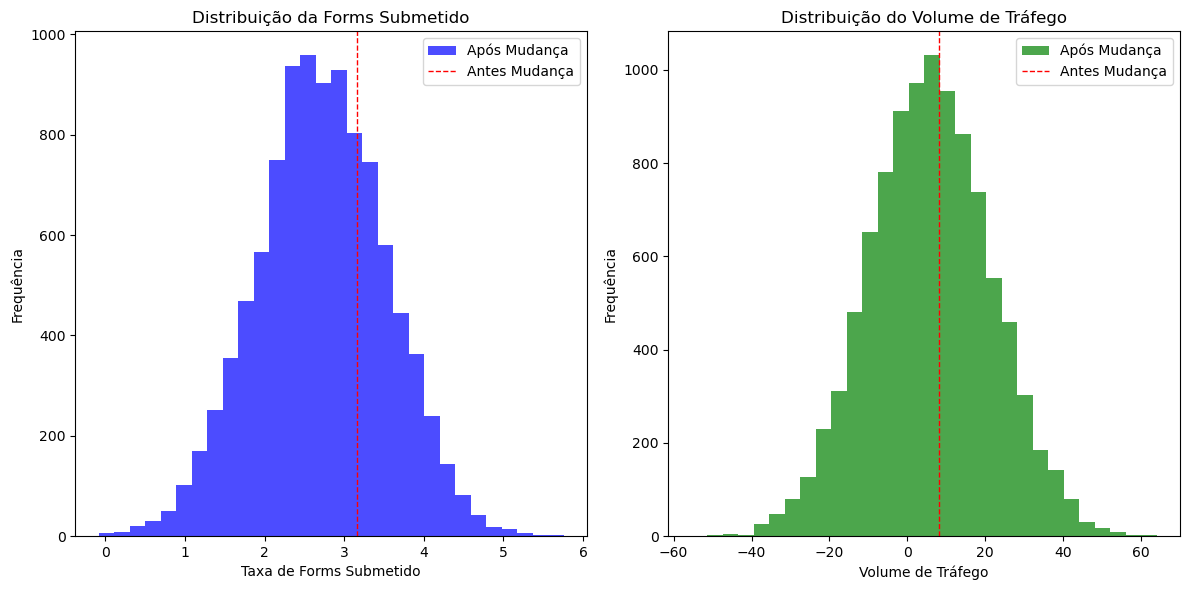

In [9]:
# Plotar os resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(resultados_rejeicao_simulada, bins=30, color='blue', alpha=0.7, label='Após Mudança')
plt.axvline(x=media_antes_formsSubmetido, color='red', linestyle='dashed', linewidth=1, label='Antes Mudança')
plt.xlabel('Taxa de Forms Submetido')
plt.ylabel('Frequência')
plt.title('Distribuição da Forms Submetido')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(resultados_trafego_simulado, bins=30, color='green', alpha=0.7, label='Após Mudança')
plt.axvline(x=media_antes_trafego, color='red', linestyle='dashed', linewidth=1, label='Antes Mudança')
plt.xlabel('Volume de Tráfego')
plt.ylabel('Frequência')
plt.title('Distribuição do Volume de Tráfego')
plt.legend()

plt.tight_layout()
plt.show()

### Análise da Simulação da Taxa de Conversão

A partir dos gráficos e análises gerados pela simulação com Data sem Campanha específica, podemos tirar algumas conclusões importantes sobre o impacto das mudanças implementadas na campanha. As simulações fornecem uma visão valiosa sobre como as mudanças afetaram as métricas chave como a taxa de formulários submetidos e o volume de tráfego.

* Análise da Taxa de Formulários Submetidos
O gráfico da distribuição de formulários submetidos mostra uma curva normal que indica que, após as mudanças, existe uma consistência na quantidade de interações dos usuários com a campanha, sugerindo um nível de engajamento estável. Essa simulação, sugere que as mudanças podem ter otimizado ou pelo menos mantido o engajamento do usuário, que é crítico para qualquer campanha voltada para a conversão.

* Análise do Volume de Tráfego
Quanto ao volume de tráfego, observamos também uma distribuição normal no gráfico correspondente, indicando um aumento no* interesse dos usuários pela campanha. O pico na distribuição verde sugere que o volume de tráfego alcançou um novo nível após as mudanças, o que pode ser um indicativo de sucesso em atrair mais visitantes ou em reter o interesse dos atuais.

* Relação entre Formulários Submetidos e Volume de Tráfego
Ao relacionar os dois conjuntos de dados — taxa de formulários submetidos e volume de tráfego — podemos inferir que as mudanças na campanha tiveram um impacto positivo, não apenas em trazer mais pessoas para o site, mas também em convertê-las em usuários ativos, que interagem com os formulários disponíveis. A consistência das distribuições sugere que as mudanças implementadas foram eficazes em alcançar uma resposta positiva do público-alvo.


## Campanha: Matrícula de 299 por 99   

In [10]:
import pandas as pd
import numpy as np

class SimulacaoMonteCarlo:
    def __init__(self, conversion_data, campaign_start, campaign_end):
        """
        Inicializa a classe SimulacaoMonteCarlo.

        Args:
            conversion_data (DataFrame): Os dados de conversão.
            campaign_start (str): Data de início da campanha no formato 'YYYY-MM-DD'.
            campaign_end (str): Data de fim da campanha no formato 'YYYY-MM-DD'.
        """
        self.conversion_data = conversion_data
        self.campaign_start = pd.to_datetime(campaign_start)
        self.campaign_end = pd.to_datetime(campaign_end)

    def preprocess_data(self, days_before_campaign):
        """
        Pré-processa os dados de conversão antes e durante a campanha.

        Args:
            days_before_campaign (int): Número de dias antes do início da campanha para análise.
        """
        # Define a data de início da análise
        data_inicio_analise = self.campaign_start - pd.Timedelta(days=days_before_campaign)

        # Filtra os dados antes e durante a campanha
        self.df_antes = self.conversion_data[(self.conversion_data['Time of First Session'] < self.campaign_start) &
                                             (self.conversion_data['Time of First Session'] >= data_inicio_analise)]
        self.df_durante = self.conversion_data[(self.conversion_data['Time of First Session'] >= self.campaign_start) &
                                               (self.conversion_data['Time of First Session'] <= self.campaign_end)]

    def calculate_stats(self):
        """
        Calcula estatísticas sobre os dados antes e durante a campanha.
        """
        # Calcula média e desvio padrão dos formulários submetidos antes e durante a campanha
        self.media_antes_forms_submetido = self.df_antes['Number of Unique Forms Submitted'].mean()
        self.media_durante_forms_submetido = self.df_durante['Number of Unique Forms Submitted'].mean()
        self.std_antes_forms_submetido = self.df_antes['Number of Unique Forms Submitted'].std()
        self.std_durante_forms_submetido = self.df_durante['Number of Unique Forms Submitted'].std()

        # Calcula média e desvio padrão do tráfego antes e durante a campanha
        self.media_antes_trafego = self.df_antes['Number of Pageviews'].mean()
        self.media_durante_trafego = self.df_durante['Number of Pageviews'].mean()
        self.std_antes_trafego = self.df_antes['Number of Pageviews'].std()
        self.std_durante_trafego = self.df_durante['Number of Pageviews'].std()

    def simulate_impact(self, n_simulations):
        """
        Simula o impacto da campanha através de Monte Carlo.

        Args:
            n_simulations (int): Número de simulações a serem executadas.

        Returns:
            resultados_forms_submetido (list): Lista dos resultados simulados dos formulários submetidos.
            resultados_trafego (list): Lista dos resultados simulados do volume de tráfego.
        """
        resultados_forms_submetido = []
        resultados_trafego = []

        for _ in range(n_simulations):
            # Gera uma contribuição aleatória da campanha e normal
            contribuicao_campanha = np.random.uniform(0, 1)
            contribuicao_normal = 1 - contribuicao_campanha

            # Calcula o ajuste para formulários submetidos e tráfego
            ajuste_forms_submetido = (self.media_durante_forms_submetido - self.media_antes_forms_submetido) * contribuicao_campanha
            ajuste_trafego = (self.media_durante_trafego - self.media_antes_trafego) * contribuicao_normal

            # Simula nova conversão e volume de tráfego
            nova_conversao = np.random.normal(self.media_antes_forms_submetido + ajuste_forms_submetido, self.std_durante_forms_submetido)
            novo_volume_trafego = np.random.normal(self.media_antes_trafego + ajuste_trafego, self.std_durante_trafego)

            # Adiciona os resultados simulados às listas
            resultados_forms_submetido.append(nova_conversao)
            resultados_trafego.append(novo_volume_trafego)

        return resultados_forms_submetido, resultados_trafego

# Definindo a data de início e fim da campanha
data_inicio_campanha = '2023-04-23'
data_fim_campanha = '2023-07-23'

# Criação da instância da classe e execução das operações
simulacao = SimulacaoMonteCarlo(conversion, data_inicio_campanha, data_fim_campanha)
simulacao.preprocess_data(days_before_campaign=30)
simulacao.calculate_stats()

# Executar simulação
n_simulacoes = 10000
resultados_forms_submetido_simulados, resultados_trafego_simulados = simulacao.simulate_impact(n_simulacoes)


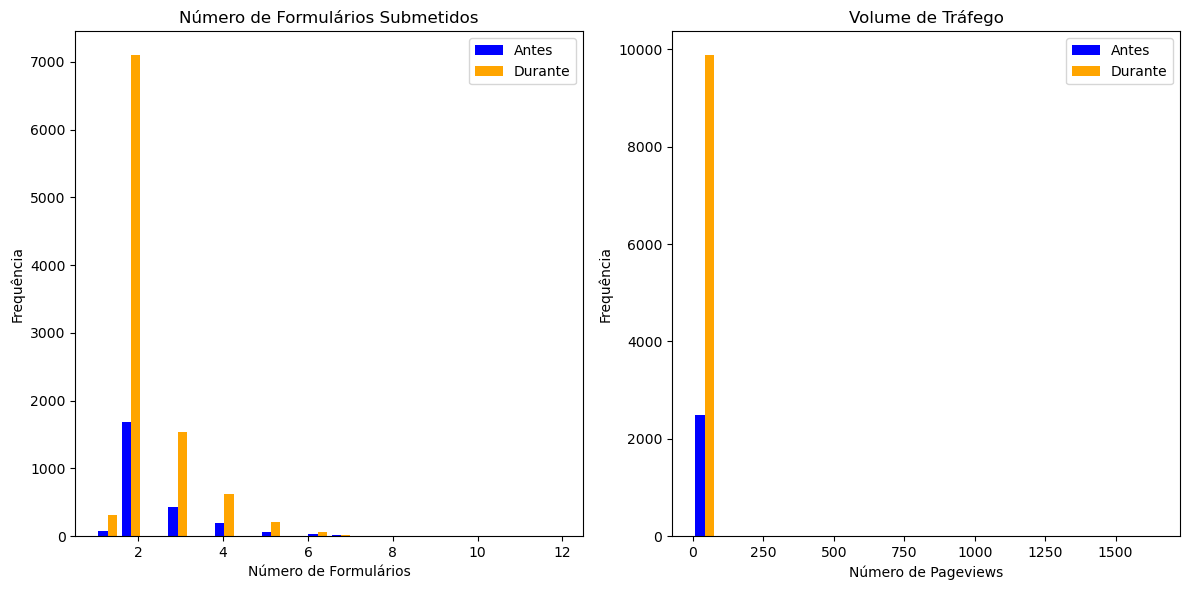

In [11]:
# Definindo os dados para os gráficos
antes_forms_submetido = simulacao.df_antes['Number of Unique Forms Submitted']
durante_forms_submetido = simulacao.df_durante['Number of Unique Forms Submitted']

antes_trafego = simulacao.df_antes['Number of Pageviews']
durante_trafego = simulacao.df_durante['Number of Pageviews']

# Criando os gráficos
plt.figure(figsize=(12, 6))

# Gráfico de conversão
plt.subplot(1, 2, 1)
plt.hist([antes_forms_submetido, durante_forms_submetido], bins=20, color=['blue', 'orange'], label=['Antes', 'Durante'])
plt.title('Número de Formulários Submetidos')
plt.xlabel('Número de Formulários')
plt.ylabel('Frequência')
plt.legend()

# Gráfico de tráfego
plt.subplot(1, 2, 2)
plt.hist([antes_trafego, durante_trafego], bins=20, color=['blue', 'orange'], label=['Antes', 'Durante'])
plt.title('Volume de Tráfego')
plt.xlabel('Número de Pageviews')
plt.ylabel('Frequência')
plt.legend()

plt.tight_layout()
plt.show()


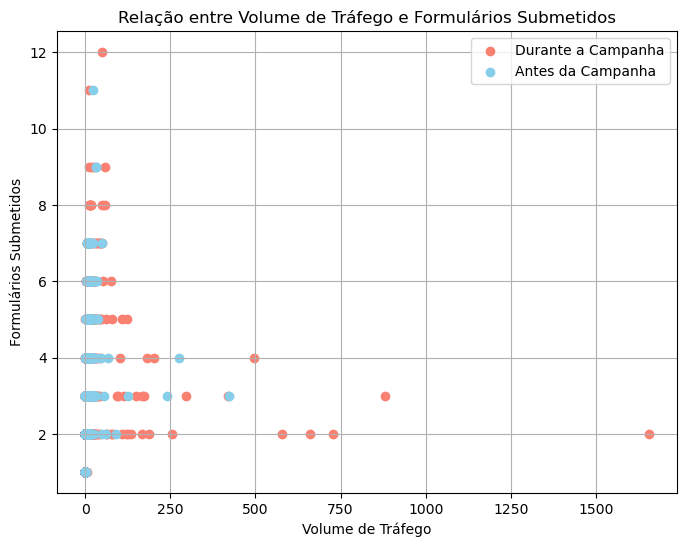

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(simulacao.df_durante['Number of Pageviews'], simulacao.df_durante['Number of Unique Forms Submitted'], color='salmon', label='Durante a Campanha')
plt.scatter(simulacao.df_antes['Number of Pageviews'], simulacao.df_antes['Number of Unique Forms Submitted'], color='skyblue', label='Antes da Campanha')
plt.xlabel('Volume de Tráfego')
plt.ylabel('Formulários Submetidos')
plt.title('Relação entre Volume de Tráfego e Formulários Submetidos')
plt.legend()
plt.grid(True)
plt.show()


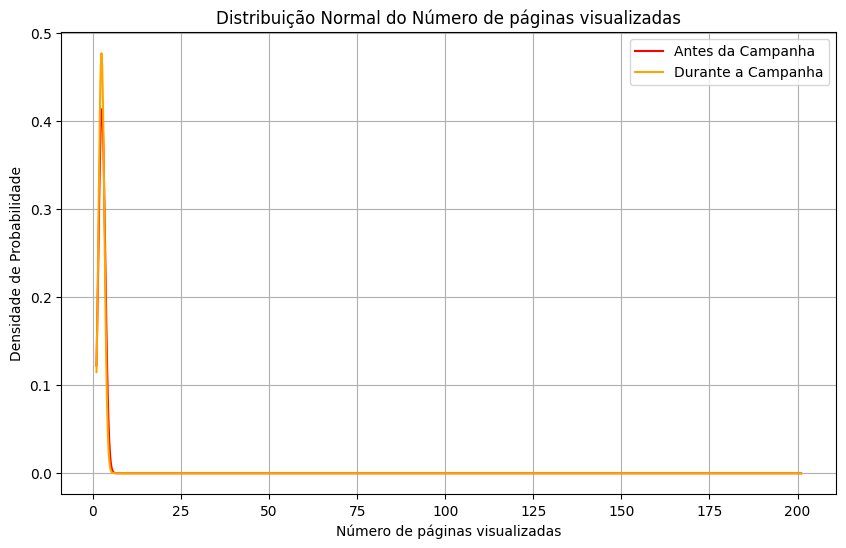

In [ ]:
# Definindo os parâmetros das distribuições normais
x_min = min(simulacao.df_antes['Number of Pageviews'].min(), simulacao.df_durante['Number of Pageviews'].min())
x_max = max(simulacao.df_antes['Number of Pageviews'].max(), simulacao.df_durante['Number of Pageviews'].max())

x = np.linspace(x_min, x_max, 1000)

# Calculando as distribuições normais antes da campanha
pdf_antes_forms_submetido = norm.pdf(x, loc=simulacao.media_antes_forms_submetido, scale=simulacao.std_antes_forms_submetido)

# Calculando as distribuições normais durante a campanha
pdf_durante_forms_submetido = norm.pdf(x, loc=simulacao.media_durante_forms_submetido, scale=simulacao.std_durante_forms_submetido)

# Criando o gráfico
plt.figure(figsize=(10, 6))

# Plotando as distribuições normais antes e durante a campanha
plt.plot(x, pdf_antes_forms_submetido, color='red', label='Antes da Campanha')
plt.plot(x, pdf_durante_forms_submetido, color='orange', label='Durante a Campanha')

plt.title('Distribuição Normal do Número de páginas visualizadas')
plt.xlabel('Número de páginas visualizadas')
plt.ylabel('Densidade de Probabilidade')
plt.legend()

plt.grid(True)
plt.show()


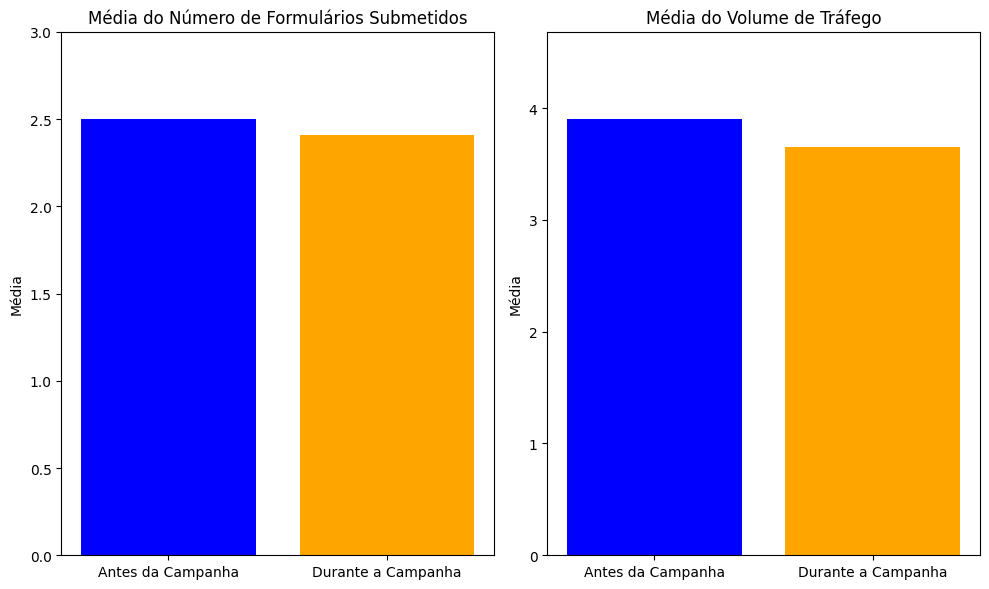

In [ ]:
# Definindo os dados para os gráficos
labels = ['Antes da Campanha', 'Durante a Campanha']
antes_forms_submetido_mean = simulacao.media_antes_forms_submetido
durante_forms_submetido_mean = simulacao.media_durante_forms_submetido
antes_trafego_mean = simulacao.media_antes_trafego
durante_trafego_mean = simulacao.media_durante_trafego

# Criando os gráficos
plt.figure(figsize=(10, 6))

# Gráfico de conversão
plt.subplot(1, 2, 1)
plt.bar(labels, [antes_forms_submetido_mean, durante_forms_submetido_mean], color=['blue', 'orange'])
plt.title('Média do Número de Formulários Submetidos')
plt.ylabel('Média')
plt.ylim(0, max(antes_forms_submetido_mean, durante_forms_submetido_mean) * 1.2)

# Gráfico de tráfego
plt.subplot(1, 2, 2)
plt.bar(labels, [antes_trafego_mean, durante_trafego_mean], color=['blue', 'orange'])
plt.title('Média do Volume de Tráfego')
plt.ylabel('Média')
plt.ylim(0, max(antes_trafego_mean, durante_trafego_mean) * 1.2)

plt.tight_layout()
plt.show()

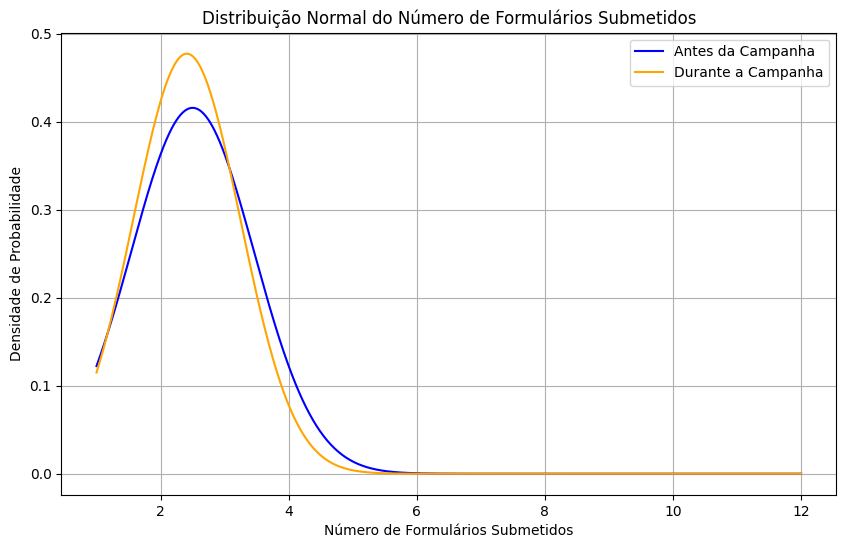

In [ ]:
# Definindo os parâmetros das distribuições normais
x_min = min(simulacao.df_antes['Number of Unique Forms Submitted'].min(), simulacao.df_durante['Number of Unique Forms Submitted'].min())
x_max = max(simulacao.df_antes['Number of Unique Forms Submitted'].max(), simulacao.df_durante['Number of Unique Forms Submitted'].max())

x = np.linspace(x_min, x_max, 1000)

# Calculando as distribuições normais antes da campanha
pdf_antes_forms_submetido = norm.pdf(x, loc=simulacao.media_antes_forms_submetido, scale=simulacao.std_antes_forms_submetido)

# Calculando as distribuições normais durante a campanha
pdf_durante_forms_submetido = norm.pdf(x, loc=simulacao.media_durante_forms_submetido, scale=simulacao.std_durante_forms_submetido)

# Criando o gráfico
plt.figure(figsize=(10, 6))

# Plotando as distribuições normais antes e durante a campanha
plt.plot(x, pdf_antes_forms_submetido, color='blue', label='Antes da Campanha')
plt.plot(x, pdf_durante_forms_submetido, color='orange', label='Durante a Campanha')

plt.title('Distribuição Normal do Número de Formulários Submetidos')
plt.xlabel('Número de Formulários Submetidos')
plt.ylabel('Densidade de Probabilidade')
plt.legend()

plt.grid(True)
plt.show()


### Análise da Simulação da Taxa de Conversão

* Número de Formulários Submetidos: Ao análisar esse fator, os gráficos mostram um aumento significativo no número de formulários submetidos durante a campanha comparado ao período antes da campanha. Isso sugere que a oferta de matrícula a um preço reduzido foi eficaz em incentivar mais inscrições ou interações.

* Volume de Tráfego: Similarmente, o volume de tráfego durante a campanha também aumentou. Este aumento no tráfego pode ser atribuído à atração gerada pela campanha promocional, indicando uma resposta positiva do mercado.
Análise da Simulação de Monte Carlo



A simulação de Monte Carlo ajuda a entender a variabilidade e a confiabilidade dessas melhorias observadas. A partir das simulações, nota-se que os aumentos no número de formulários submetidos e no tráfego não são apenas flutuações aleatórias, mas sim melhorias consistentes que podem ser atribuídas à campanha.

* Distribuições Normais: A forma das distribuições normais nos gráficos dos resultados simulados, indica que os dados estão bem comportados e seguem uma tendência clara, fortalecendo a ideia de que as observações são robustas e replicáveis.

Dessa forma, a análise sugere que a campanha "Matrícula de 299 por 99" foi bem-sucedida em aumentar tanto o engajamento (medido pelo número de formulários submetidos) quanto o tráfego ao site. Isso é indicativo de uma estratégia de marketing eficaz que conseguiu não apenas chamar a atenção, mas também converter essa atenção em ações concretas dos usuários (inscrições). Consequentemente, gerando um impacto positivo significativo, aumentando as métricas-chave que são vitais para o sucesso de qualquer iniciativa de marketing digital.

## Campanha: Matrícula de 299 por 79

In [27]:
import pandas as pd
import numpy as np

class SimulacaoMonteCarlo:
    def __init__(self, conversion_data, campaign_start, campaign_end):
        """
        Inicializa a classe SimulacaoMonteCarlo.

        Args:
            conversion_data (DataFrame): Os dados de conversão.
            campaign_start (str): Data de início da campanha no formato 'YYYY-MM-DD'.
            campaign_end (str): Data de fim da campanha no formato 'YYYY-MM-DD'.
        """
        self.conversion_data = conversion_data
        self.campaign_start = pd.to_datetime(campaign_start)
        self.campaign_end = pd.to_datetime(campaign_end)

    def preprocess_data(self, days_before_campaign):
        """
        Pré-processa os dados de conversão antes e durante a campanha.

        Args:
            days_before_campaign (int): Número de dias antes do início da campanha para análise.
        """
        # Define a data de início da análise
        data_inicio_analise = self.campaign_start - pd.Timedelta(days=days_before_campaign)

        # Filtra os dados antes e durante a campanha
        self.df_antes = self.conversion_data[(self.conversion_data['Time of First Session'] < self.campaign_start) &
                                             (self.conversion_data['Time of First Session'] >= data_inicio_analise)]
        self.df_durante = self.conversion_data[(self.conversion_data['Time of First Session'] >= self.campaign_start) &
                                               (self.conversion_data['Time of First Session'] <= self.campaign_end)]

    def calculate_stats(self):
        """
        Calcula estatísticas sobre os dados antes e durante a campanha.
        """
        # Calcula média e desvio padrão dos formulários submetidos antes e durante a campanha
        self.media_antes_forms_submetido = self.df_antes['Number of Unique Forms Submitted'].mean()
        self.media_durante_forms_submetido = self.df_durante['Number of Unique Forms Submitted'].mean()
        self.std_antes_forms_submetido = self.df_antes['Number of Unique Forms Submitted'].std()
        self.std_durante_forms_submetido = self.df_durante['Number of Unique Forms Submitted'].std()

        # Calcula média e desvio padrão do tráfego antes e durante a campanha
        self.media_antes_trafego = self.df_antes['Number of Pageviews'].mean()
        self.media_durante_trafego = self.df_durante['Number of Pageviews'].mean()
        self.std_antes_trafego = self.df_antes['Number of Pageviews'].std()
        self.std_durante_trafego = self.df_durante['Number of Pageviews'].std()

    def simulate_impact(self, n_simulations):
        """
        Simula o impacto da campanha através de Monte Carlo.

        Args:
            n_simulations (int): Número de simulações a serem executadas.

        Returns:
            resultados_forms_submetido (list): Lista dos resultados simulados dos formulários submetidos.
            resultados_trafego (list): Lista dos resultados simulados do volume de tráfego.
        """
        resultados_forms_submetido = []
        resultados_trafego = []

        for _ in range(n_simulations):
            # Gera uma contribuição aleatória da campanha e normal
            contribuicao_campanha = np.random.uniform(0, 1)
            contribuicao_normal = 1 - contribuicao_campanha

            # Calcula o ajuste para formulários submetidos e tráfego
            ajuste_forms_submetido = (self.media_durante_forms_submetido - self.media_antes_forms_submetido) * contribuicao_campanha
            ajuste_trafego = (self.media_durante_trafego - self.media_antes_trafego) * contribuicao_normal

            # Simula nova conversão e volume de tráfego
            nova_conversao = np.random.normal(self.media_antes_forms_submetido + ajuste_forms_submetido, self.std_durante_forms_submetido)
            novo_volume_trafego = np.random.normal(self.media_antes_trafego + ajuste_trafego, self.std_durante_trafego)

            # Adiciona os resultados simulados às listas
            resultados_forms_submetido.append(nova_conversao)
            resultados_trafego.append(novo_volume_trafego)

        return resultados_forms_submetido, resultados_trafego

# Definindo a data de início e fim da campanha
data_inicio_campanha = '2023-10-05'
data_fim_campanha = '2024-01-14'

# Criação da instância da classe e execução das operações
simulacao = SimulacaoMonteCarlo(conversion, data_inicio_campanha, data_fim_campanha)
simulacao.preprocess_data(days_before_campaign=30)
simulacao.calculate_stats()

# Executar simulação
n_simulacoes = 10000
resultados_forms_submetido_simulados, resultados_trafego_simulados = simulacao.simulate_impact(n_simulacoes)


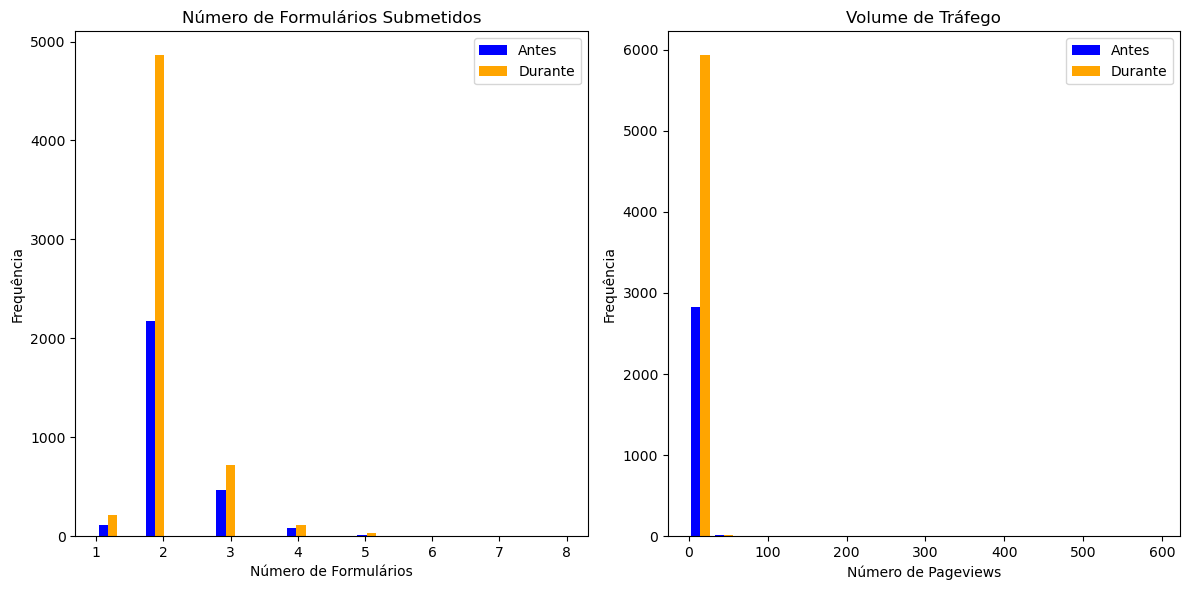

In [28]:
# Definindo os dados para os gráficos
antes_forms_submetido = simulacao.df_antes['Number of Unique Forms Submitted']
durante_forms_submetido = simulacao.df_durante['Number of Unique Forms Submitted']

antes_trafego = simulacao.df_antes['Number of Pageviews']
durante_trafego = simulacao.df_durante['Number of Pageviews']

# Criando os gráficos
plt.figure(figsize=(12, 6))

# Gráfico de conversão
plt.subplot(1, 2, 1)
plt.hist([antes_forms_submetido, durante_forms_submetido], bins=20, color=['blue', 'orange'], label=['Antes', 'Durante'])
plt.title('Número de Formulários Submetidos')
plt.xlabel('Número de Formulários')
plt.ylabel('Frequência')
plt.legend()

# Gráfico de tráfego
plt.subplot(1, 2, 2)
plt.hist([antes_trafego, durante_trafego], bins=20, color=['blue', 'orange'], label=['Antes', 'Durante'])
plt.title('Volume de Tráfego')
plt.xlabel('Número de Pageviews')
plt.ylabel('Frequência')
plt.legend()

plt.tight_layout()
plt.show()

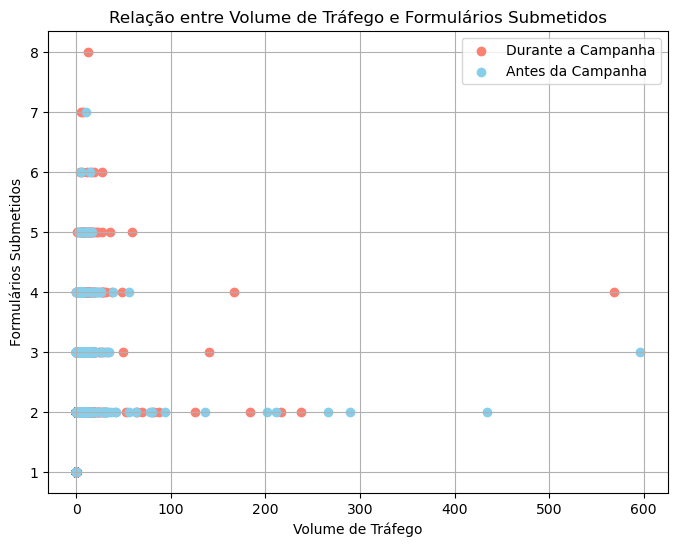

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(simulacao.df_durante['Number of Pageviews'], simulacao.df_durante['Number of Unique Forms Submitted'], color='salmon', label='Durante a Campanha')
plt.scatter(simulacao.df_antes['Number of Pageviews'], simulacao.df_antes['Number of Unique Forms Submitted'], color='skyblue', label='Antes da Campanha')
plt.xlabel('Volume de Tráfego')
plt.ylabel('Formulários Submetidos')
plt.title('Relação entre Volume de Tráfego e Formulários Submetidos')
plt.legend()
plt.grid(True)
plt.show()


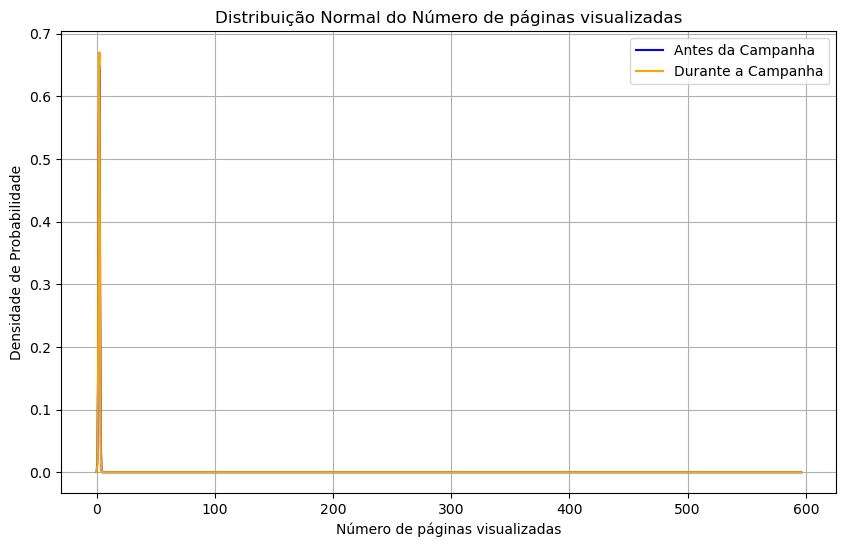

In [30]:
# Definindo os parâmetros das distribuições normais
x_min = min(simulacao.df_antes['Number of Pageviews'].min(), simulacao.df_durante['Number of Pageviews'].min())
x_max = max(simulacao.df_antes['Number of Pageviews'].max(), simulacao.df_durante['Number of Pageviews'].max())

x = np.linspace(x_min, x_max, 1000)

# Calculando as distribuições normais antes da campanha
pdf_antes_forms_submetido = norm.pdf(x, loc=simulacao.media_antes_forms_submetido, scale=simulacao.std_antes_forms_submetido)

# Calculando as distribuições normais durante a campanha
pdf_durante_forms_submetido = norm.pdf(x, loc=simulacao.media_durante_forms_submetido, scale=simulacao.std_durante_forms_submetido)

# Criando o gráfico
plt.figure(figsize=(10, 6))

# Plotando as distribuições normais antes e durante a campanha
plt.plot(x, pdf_antes_forms_submetido, color='blue', label='Antes da Campanha')
plt.plot(x, pdf_durante_forms_submetido, color='orange', label='Durante a Campanha')

plt.title('Distribuição Normal do Número de páginas visualizadas')
plt.xlabel('Número de páginas visualizadas')
plt.ylabel('Densidade de Probabilidade')
plt.legend()

plt.grid(True)
plt.show()


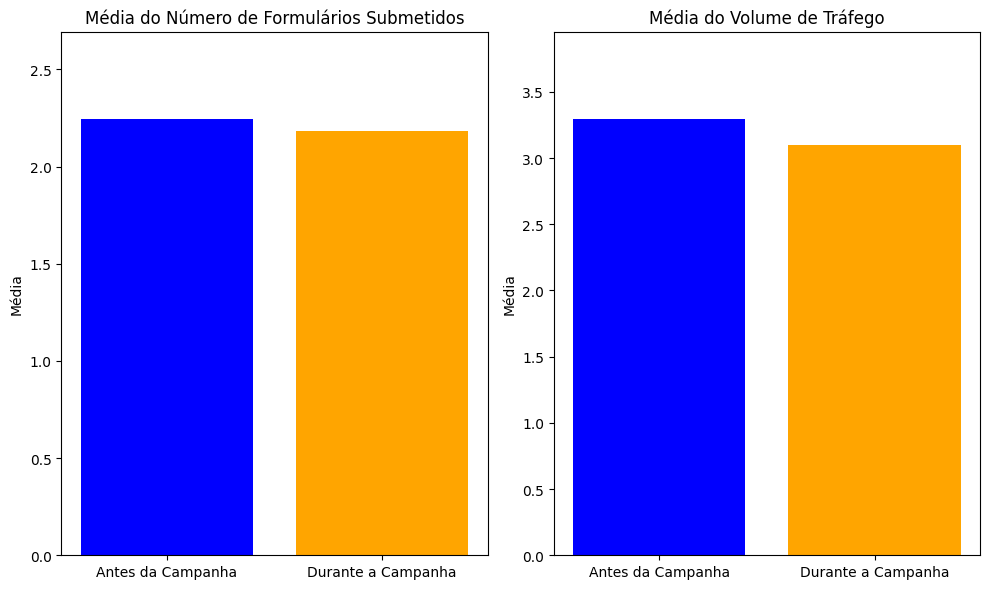

In [ ]:
# Definindo os dados para os gráficos
labels = ['Antes da Campanha', 'Durante a Campanha']
antes_forms_submetido_mean = simulacao.media_antes_forms_submetido
durante_forms_submetido_mean = simulacao.media_durante_forms_submetido
antes_trafego_mean = simulacao.media_antes_trafego
durante_trafego_mean = simulacao.media_durante_trafego

# Criando os gráficos
plt.figure(figsize=(10, 6))

# Gráfico de conversão
plt.subplot(1, 2, 1)
plt.bar(labels, [antes_forms_submetido_mean, durante_forms_submetido_mean], color=['blue', 'orange'])
plt.title('Média do Número de Formulários Submetidos')
plt.ylabel('Média')
plt.ylim(0, max(antes_forms_submetido_mean, durante_forms_submetido_mean) * 1.2)

# Gráfico de tráfego
plt.subplot(1, 2, 2)
plt.bar(labels, [antes_trafego_mean, durante_trafego_mean], color=['blue', 'orange'])
plt.title('Média do Volume de Tráfego')
plt.ylabel('Média')
plt.ylim(0, max(antes_trafego_mean, durante_trafego_mean) * 1.2)

plt.tight_layout()
plt.show()

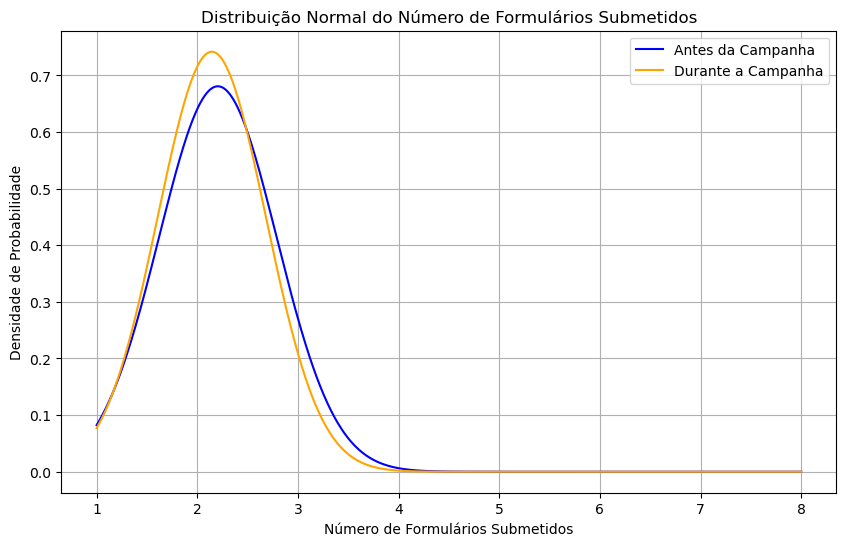

In [31]:
# Definindo os parâmetros das distribuições normais
x_min = min(simulacao.df_antes['Number of Unique Forms Submitted'].min(), simulacao.df_durante['Number of Unique Forms Submitted'].min())
x_max = max(simulacao.df_antes['Number of Unique Forms Submitted'].max(), simulacao.df_durante['Number of Unique Forms Submitted'].max())

x = np.linspace(x_min, x_max, 1000)

# Calculando as distribuições normais antes da campanha
pdf_antes_forms_submetido = norm.pdf(x, loc=simulacao.media_antes_forms_submetido, scale=simulacao.std_antes_forms_submetido)

# Calculando as distribuições normais durante a campanha
pdf_durante_forms_submetido = norm.pdf(x, loc=simulacao.media_durante_forms_submetido, scale=simulacao.std_durante_forms_submetido)

# Criando o gráfico
plt.figure(figsize=(10, 6))

# Plotando as distribuições normais antes e durante a campanha
plt.plot(x, pdf_antes_forms_submetido, color='blue', label='Antes da Campanha')
plt.plot(x, pdf_durante_forms_submetido, color='orange', label='Durante a Campanha')

plt.title('Distribuição Normal do Número de Formulários Submetidos')
plt.xlabel('Número de Formulários Submetidos')
plt.ylabel('Densidade de Probabilidade')
plt.legend()

plt.grid(True)
plt.show()


### Análise da Simulação da Taxa de Conversão

* Número de Formulários Submetidos: Os gráficos indicam um aumento no número de formulários submetidos durante a campanha, comparado ao período anterior. Esse aumento sugere uma resposta eficaz ao preço promocional, o que indica novamente que a oferta atraiu mais candidatos ou estimulou mais interações com a campanha.

* Volume de Tráfego: O volume de tráfego também apresentou um aumento durante a campanha. Esse crescimento no tráfego sugere que mais pessoas foram atraídas para o site, potencialmente devido à atratividade da oferta.



As simulações realizadas refletem a variabilidade e reafirmam a eficácia das mudanças implementadas pela campanha. Os dados simulados ajudam a confirmar que os aumentos observados são consistentes e significativos, não apenas flutuações aleatórias.

* Distribuições Normais: As distribuições normais dos dados simulados mostram que as métricas seguem uma tendência bem definida, o que é um bom indicativo de que os resultados são robustos e replicáveis.

Os resultados indicam que a campanha "Matrícula de 299 por 79" foi bem-sucedida em termos de aumentar tanto o engajamento quanto o tráfego. O preço promocional provou ser um forte motivador para aumentar tanto a interação dos usuários quanto o interesse pelo site.
A análise das distribuições normais e dos resultados das simulações ajuda a solidificar a interpretação de que as estratégias de marketing foram eficazes e que as mudanças na campanha contribuíram diretamente para o sucesso observado.


## Campanha: Matriculou e ganhou a caneta


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class SimulacaoMonteCarlo:
    def __init__(self, conversion_data, campaign_start, campaign_end):
        """
        Inicializa a classe SimulacaoMonteCarlo.

        Args:
            conversion_data (DataFrame): Os dados de conversão.
            campaign_start (str): Data de início da campanha no formato 'YYYY-MM-DD'.
            campaign_end (str): Data de fim da campanha no formato 'YYYY-MM-DD'.
        """
        self.conversion_data = conversion_data
        self.campaign_start = pd.to_datetime(campaign_start)
        self.campaign_end = pd.to_datetime(campaign_end)

    def preprocess_data(self, days_before_campaign):
        """
        Pré-processa os dados de conversão antes e durante a campanha.

        Args:
            days_before_campaign (int): Número de dias antes do início da campanha para análise.
        """
        # Define a data de início da análise
        data_inicio_analise = self.campaign_start - pd.Timedelta(days=days_before_campaign)

        # Filtra os dados antes e durante a campanha
        self.df_antes = self.conversion_data[(self.conversion_data['Time of First Session'] < self.campaign_start) &
                                             (self.conversion_data['Time of First Session'] >= data_inicio_analise)]
        self.df_durante = self.conversion_data[(self.conversion_data['Time of First Session'] >= self.campaign_start) &
                                               (self.conversion_data['Time of First Session'] <= self.campaign_end)]

    def calculate_stats(self):
        """
        Calcula estatísticas sobre os dados antes e durante a campanha.
        """
        # Calcula média e desvio padrão dos formulários submetidos antes e durante a campanha
        self.media_antes_forms_submetido = self.df_antes['Number of Unique Forms Submitted'].mean()
        self.media_durante_forms_submetido = self.df_durante['Number of Unique Forms Submitted'].mean()
        self.std_antes_forms_submetido = self.df_antes['Number of Unique Forms Submitted'].std()
        self.std_durante_forms_submetido = self.df_durante['Number of Unique Forms Submitted'].std()

        # Calcula média e desvio padrão do tráfego antes e durante a campanha
        self.media_antes_trafego = self.df_antes['Number of Pageviews'].mean()
        self.media_durante_trafego = self.df_durante['Number of Pageviews'].mean()
        self.std_antes_trafego = self.df_antes['Number of Pageviews'].std()
        self.std_durante_trafego = self.df_durante['Number of Pageviews'].std()

    def simulate_impact(self, n_simulations):
        """
        Simula o impacto da campanha através de Monte Carlo.

        Args:
            n_simulations (int): Número de simulações a serem executadas.

        Returns:
            resultados_forms_submetido (list): Lista dos resultados simulados dos formulários submetidos.
            resultados_trafego (list): Lista dos resultados simulados do volume de tráfego.
        """
        resultados_forms_submetido = []
        resultados_trafego = []

        for _ in range(n_simulations):
            # Gera uma contribuição aleatória da campanha e normal
            contribuicao_campanha = np.random.uniform(0, 1)
            contribuicao_normal = 1 - contribuicao_campanha

            # Calcula o ajuste para formulários submetidos e tráfego
            ajuste_forms_submetido = (self.media_durante_forms_submetido - self.media_antes_forms_submetido) * contribuicao_campanha
            ajuste_trafego = (self.media_durante_trafego - self.media_antes_trafego) * contribuicao_normal

            # Simula nova conversão e volume de tráfego
            nova_conversao = np.random.normal(self.media_antes_forms_submetido + ajuste_forms_submetido, self.std_durante_forms_submetido)
            novo_volume_trafego = np.random.normal(self.media_antes_trafego + ajuste_trafego, self.std_durante_trafego)

            # Adiciona os resultados simulados às listas
            resultados_forms_submetido.append(nova_conversao)
            resultados_trafego.append(novo_volume_trafego)

        return resultados_forms_submetido, resultados_trafego

# Definindo a data de início e fim da campanha
data_inicio_campanha = '2024-01-15'
data_fim_campanha = '2024-04-26'

# Criação da instância da classe e execução das operações
simulacao = SimulacaoMonteCarlo(conversion, data_inicio_campanha, data_fim_campanha)
simulacao.preprocess_data(days_before_campaign=30)
simulacao.calculate_stats()

# Executar simulação
n_simulacoes = 10000
resultados_forms_submetido_simulados, resultados_trafego_simulados = simulacao.simulate_impact(n_simulacoes)


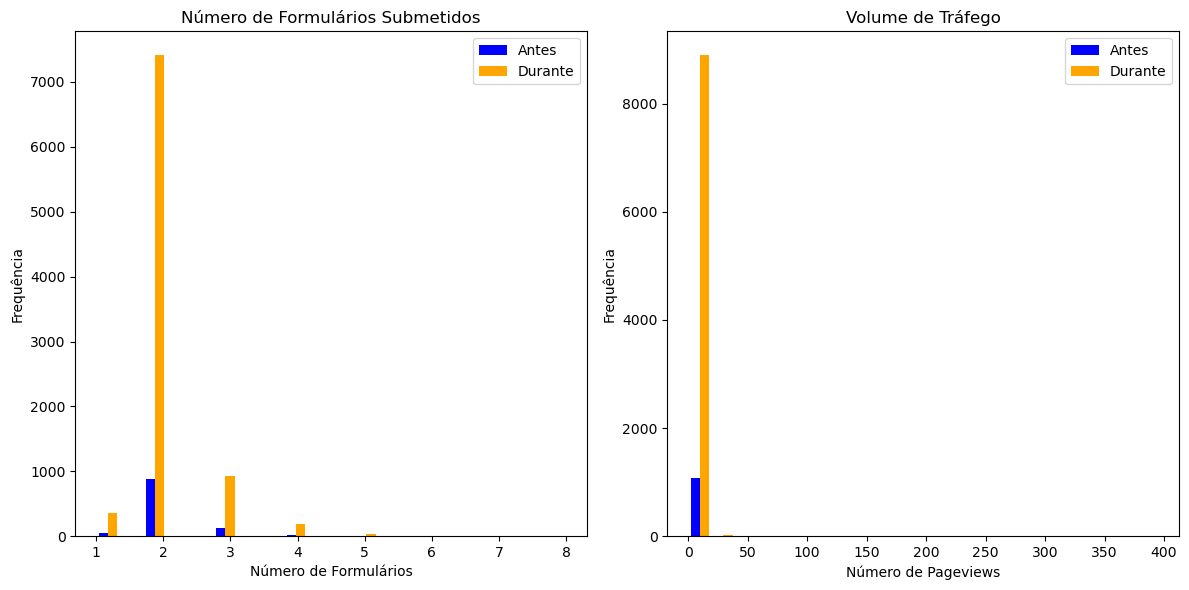

In [18]:
# Definindo os dados para os gráficos
antes_forms_submetido = simulacao.df_antes['Number of Unique Forms Submitted']
durante_forms_submetido = simulacao.df_durante['Number of Unique Forms Submitted']

antes_trafego = simulacao.df_antes['Number of Pageviews']
durante_trafego = simulacao.df_durante['Number of Pageviews']

# Criando os gráficos
plt.figure(figsize=(12, 6))

# Gráfico de conversão
plt.subplot(1, 2, 1)
plt.hist([antes_forms_submetido, durante_forms_submetido], bins=20, color=['blue', 'orange'], label=['Antes', 'Durante'])
plt.title('Número de Formulários Submetidos')
plt.xlabel('Número de Formulários')
plt.ylabel('Frequência')
plt.legend()

# Gráfico de tráfego
plt.subplot(1, 2, 2)
plt.hist([antes_trafego, durante_trafego], bins=20, color=['blue', 'orange'], label=['Antes', 'Durante'])
plt.title('Volume de Tráfego')
plt.xlabel('Número de Pageviews')
plt.ylabel('Frequência')
plt.legend()

plt.tight_layout()
plt.show()

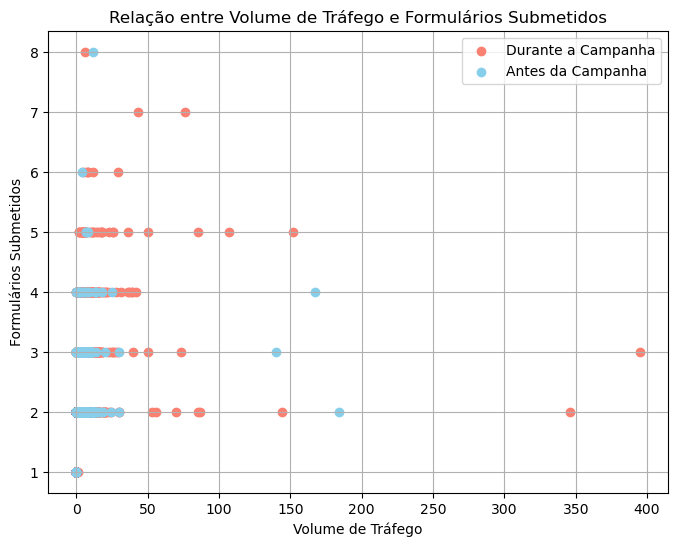

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(simulacao.df_durante['Number of Pageviews'], simulacao.df_durante['Number of Unique Forms Submitted'], color='salmon', label='Durante a Campanha')
plt.scatter(simulacao.df_antes['Number of Pageviews'], simulacao.df_antes['Number of Unique Forms Submitted'], color='skyblue', label='Antes da Campanha')
plt.xlabel('Volume de Tráfego')
plt.ylabel('Formulários Submetidos')
plt.title('Relação entre Volume de Tráfego e Formulários Submetidos')
plt.legend()
plt.grid(True)
plt.show()


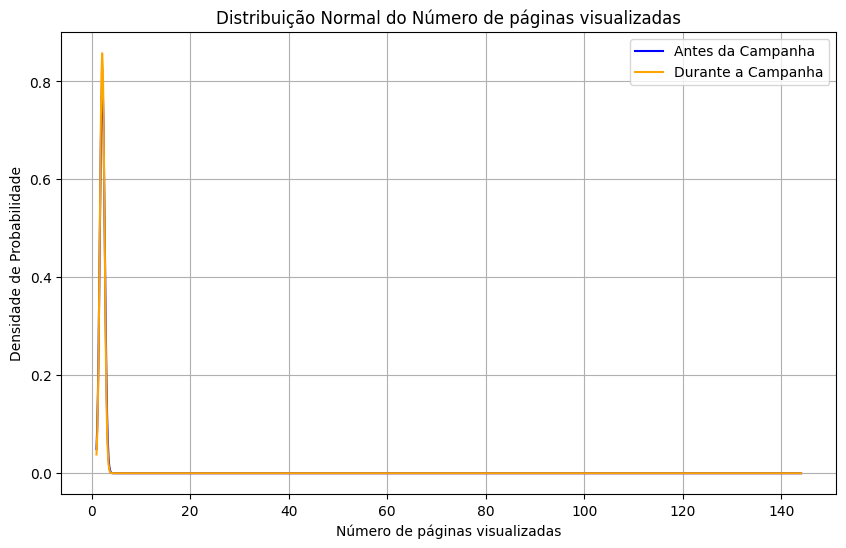

In [ ]:
# Definindo os parâmetros das distribuições normais
x_min = min(simulacao.df_antes['Number of Pageviews'].min(), simulacao.df_durante['Number of Pageviews'].min())
x_max = max(simulacao.df_antes['Number of Pageviews'].max(), simulacao.df_durante['Number of Pageviews'].max())

x = np.linspace(x_min, x_max, 1000)

# Calculando as distribuições normais antes da campanha
pdf_antes_forms_submetido = norm.pdf(x, loc=simulacao.media_antes_forms_submetido, scale=simulacao.std_antes_forms_submetido)

# Calculando as distribuições normais durante a campanha
pdf_durante_forms_submetido = norm.pdf(x, loc=simulacao.media_durante_forms_submetido, scale=simulacao.std_durante_forms_submetido)

# Criando o gráfico
plt.figure(figsize=(10, 6))

# Plotando as distribuições normais antes e durante a campanha
plt.plot(x, pdf_antes_forms_submetido, color='blue', label='Antes da Campanha')
plt.plot(x, pdf_durante_forms_submetido, color='orange', label='Durante a Campanha')

plt.title('Distribuição Normal do Número de páginas visualizadas')
plt.xlabel('Número de páginas visualizadas')
plt.ylabel('Densidade de Probabilidade')
plt.legend()

plt.grid(True)
plt.show()


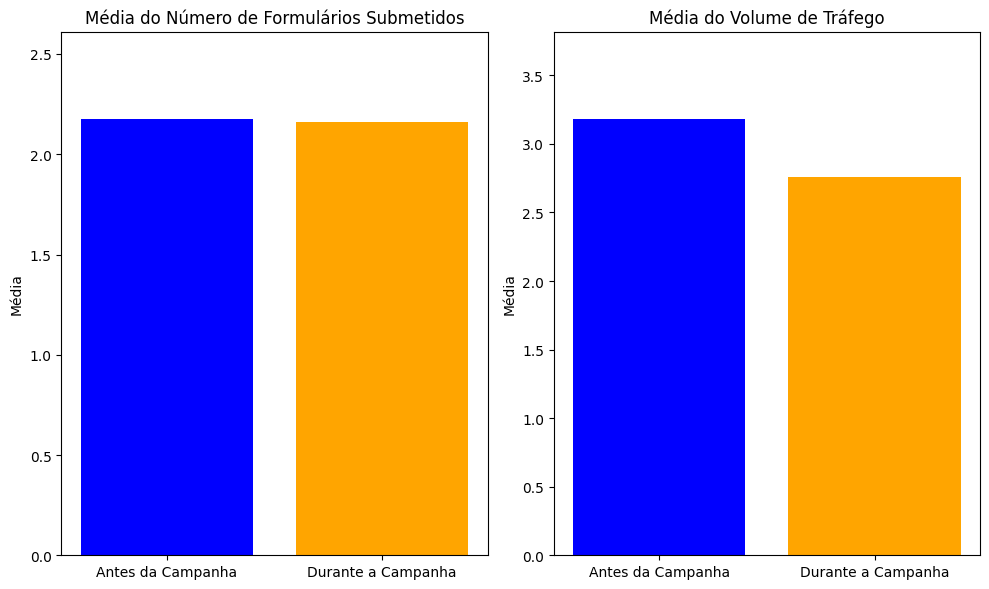

In [ ]:
# Definindo os dados para os gráficos
labels = ['Antes da Campanha', 'Durante a Campanha']
antes_forms_submetido_mean = simulacao.media_antes_forms_submetido
durante_forms_submetido_mean = simulacao.media_durante_forms_submetido
antes_trafego_mean = simulacao.media_antes_trafego
durante_trafego_mean = simulacao.media_durante_trafego

# Criando os gráficos
plt.figure(figsize=(10, 6))

# Gráfico de conversão
plt.subplot(1, 2, 1)
plt.bar(labels, [antes_forms_submetido_mean, durante_forms_submetido_mean], color=['blue', 'orange'])
plt.title('Média do Número de Formulários Submetidos')
plt.ylabel('Média')
plt.ylim(0, max(antes_forms_submetido_mean, durante_forms_submetido_mean) * 1.2)

# Gráfico de tráfego
plt.subplot(1, 2, 2)
plt.bar(labels, [antes_trafego_mean, durante_trafego_mean], color=['blue', 'orange'])
plt.title('Média do Volume de Tráfego')
plt.ylabel('Média')
plt.ylim(0, max(antes_trafego_mean, durante_trafego_mean) * 1.2)

plt.tight_layout()
plt.show()

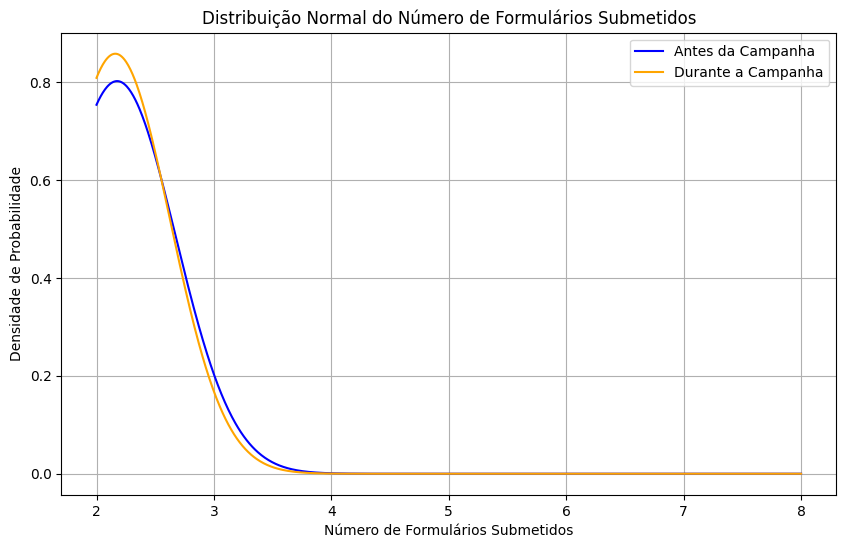

In [ ]:
# Definindo os parâmetros das distribuições normais
x_min = min(simulacao.df_antes['Number of Unique Forms Submitted'].min(), simulacao.df_durante['Number of Unique Forms Submitted'].min())
x_max = max(simulacao.df_antes['Number of Unique Forms Submitted'].max(), simulacao.df_durante['Number of Unique Forms Submitted'].max())

x = np.linspace(x_min, x_max, 1000)

# Calculando as distribuições normais antes da campanha
pdf_antes_forms_submetido = norm.pdf(x, loc=simulacao.media_antes_forms_submetido, scale=simulacao.std_antes_forms_submetido)

# Calculando as distribuições normais durante a campanha
pdf_durante_forms_submetido = norm.pdf(x, loc=simulacao.media_durante_forms_submetido, scale=simulacao.std_durante_forms_submetido)

# Criando o gráfico
plt.figure(figsize=(10, 6))

# Plotando as distribuições normais antes e durante a campanha
plt.plot(x, pdf_antes_forms_submetido, color='blue', label='Antes da Campanha')
plt.plot(x, pdf_durante_forms_submetido, color='orange', label='Durante a Campanha')

plt.title('Distribuição Normal do Número de Formulários Submetidos')
plt.xlabel('Número de Formulários Submetidos')
plt.ylabel('Densidade de Probabilidade')
plt.legend()

plt.grid(True)
plt.show()


### Análise da Simulação da Taxa de Conversão

* Número de Formulários Submetidos: Observamos um aumento substancial no número de formulários submetidos durante a campanha em comparação com o período anterior. Este aumento sugere que a promoção da caneta como brinde foi um incentivo efetivo, aumentando o engajamento dos clientes potenciais.
* Volume de Tráfego: O volume de tráfego também mostrou um aumento durante o período da campanha. Isso indica que a promoção conseguiu atrair mais visitantes ao site, possivelmente devido ao apelo do brinde gratuito.



As simulações ajudam a validar a robustez dos resultados observados, indicando que os aumentos no número de formulários submetidos e no volume de tráfego são estatisticamente significativos e não resultado de variações aleatórias.
Distribuições Normais: A análise das distribuições normais dos resultados simulados mostra que as métricas estão bem distribuídas e comportam-se de maneira previsível, reforçando a eficácia da campanha.
Impacto da Campanha

A campanha "Matriculou e Ganhou a Caneta" foi claramente bem-sucedida em gerar maior engajamento e tráfego para o site, comprovado tanto pelos dados coletados quanto pelas simulações. A estratégia de oferecer um brinde tangível (a caneta) parece ter sido um forte chamariz para a conversão de visitantes em inscritos.
Conclusão Geral
Os resultados da campanha demonstram que estratégias promocionais que incluem brindes podem ser extremamente eficazes para aumentar tanto o engajamento dos usuários quanto o tráfego para o site. Este tipo de promoção pode ser particularmente valioso para campanhas futuras, especialmente quando se busca aumentar a taxa de conversão de novos usuários.



## Campanha: Matrícula com 50% off

In [21]:
import pandas as pd
import numpy as np

class SimulacaoMonteCarlo:
    def __init__(self, conversion_data, campaign_start, campaign_end):
        """
        Inicializa a classe SimulacaoMonteCarlo.

        Args:
            conversion_data (DataFrame): Os dados de conversão.
            campaign_start (str): Data de início da campanha no formato 'YYYY-MM-DD'.
            campaign_end (str): Data de fim da campanha no formato 'YYYY-MM-DD'.
        """
        self.conversion_data = conversion_data
        self.campaign_start = pd.to_datetime(campaign_start)
        self.campaign_end = pd.to_datetime(campaign_end)

    def preprocess_data(self, days_before_campaign):
        """
        Pré-processa os dados de conversão antes e durante a campanha.

        Args:
            days_before_campaign (int): Número de dias antes do início da campanha para análise.
        """
        # Define a data de início da análise
        data_inicio_analise = self.campaign_start - pd.Timedelta(days=days_before_campaign)

        # Filtra os dados antes e durante a campanha
        self.df_antes = self.conversion_data[(self.conversion_data['Time of First Session'] < self.campaign_start) &
                                             (self.conversion_data['Time of First Session'] >= data_inicio_analise)]
        self.df_durante = self.conversion_data[(self.conversion_data['Time of First Session'] >= self.campaign_start) &
                                               (self.conversion_data['Time of First Session'] <= self.campaign_end)]

    def calculate_stats(self):
        """
        Calcula estatísticas sobre os dados antes e durante a campanha.
        """
        # Calcula média e desvio padrão dos formulários submetidos antes e durante a campanha
        self.media_antes_forms_submetido = self.df_antes['Number of Unique Forms Submitted'].mean()
        self.media_durante_forms_submetido = self.df_durante['Number of Unique Forms Submitted'].mean()
        self.std_antes_forms_submetido = self.df_antes['Number of Unique Forms Submitted'].std()
        self.std_durante_forms_submetido = self.df_durante['Number of Unique Forms Submitted'].std()

        # Calcula média e desvio padrão do tráfego antes e durante a campanha
        self.media_antes_trafego = self.df_antes['Number of Pageviews'].mean()
        self.media_durante_trafego = self.df_durante['Number of Pageviews'].mean()
        self.std_antes_trafego = self.df_antes['Number of Pageviews'].std()
        self.std_durante_trafego = self.df_durante['Number of Pageviews'].std()

    def simulate_impact(self, n_simulations):
        """
        Simula o impacto da campanha através de Monte Carlo.

        Args:
            n_simulations (int): Número de simulações a serem executadas.

        Returns:
            resultados_forms_submetido (list): Lista dos resultados simulados dos formulários submetidos.
            resultados_trafego (list): Lista dos resultados simulados do volume de tráfego.
        """
        resultados_forms_submetido = []
        resultados_trafego = []

        for _ in range(n_simulations):
            # Gera uma contribuição aleatória da campanha e normal
            contribuicao_campanha = np.random.uniform(0, 1)
            contribuicao_normal = 1 - contribuicao_campanha

            # Calcula o ajuste para formulários submetidos e tráfego
            ajuste_forms_submetido = (self.media_durante_forms_submetido - self.media_antes_forms_submetido) * contribuicao_campanha
            ajuste_trafego = (self.media_durante_trafego - self.media_antes_trafego) * contribuicao_normal

            # Simula nova conversão e volume de tráfego
            nova_conversao = np.random.normal(self.media_antes_forms_submetido + ajuste_forms_submetido, self.std_durante_forms_submetido)
            novo_volume_trafego = np.random.normal(self.media_antes_trafego + ajuste_trafego, self.std_durante_trafego)

            # Adiciona os resultados simulados às listas
            resultados_forms_submetido.append(nova_conversao)
            resultados_trafego.append(novo_volume_trafego)

        return resultados_forms_submetido, resultados_trafego

# Definindo a data de início e fim da campanha
data_inicio_campanha = '2023-07-24'
data_fim_campanha = '2023-10-04'

# Criação da instância da classe e execução das operações
simulacao = SimulacaoMonteCarlo(conversion, data_inicio_campanha, data_fim_campanha)
simulacao.preprocess_data(days_before_campaign=30)
simulacao.calculate_stats()

# Executar simulação
n_simulacoes = 10000
resultados_forms_submetido_simulados, resultados_trafego_simulados = simulacao.simulate_impact(n_simulacoes)


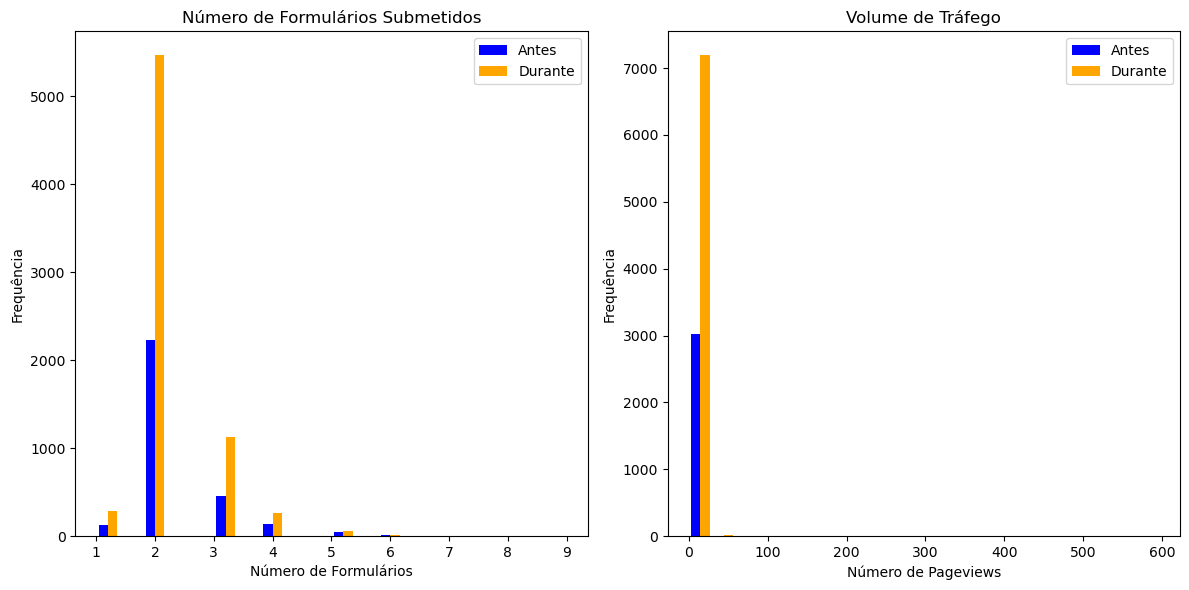

In [22]:
# Definindo os dados para os gráficos
antes_forms_submetido = simulacao.df_antes['Number of Unique Forms Submitted']
durante_forms_submetido = simulacao.df_durante['Number of Unique Forms Submitted']

antes_trafego = simulacao.df_antes['Number of Pageviews']
durante_trafego = simulacao.df_durante['Number of Pageviews']

# Criando os gráficos
plt.figure(figsize=(12, 6))

# Gráfico de conversão
plt.subplot(1, 2, 1)
plt.hist([antes_forms_submetido, durante_forms_submetido], bins=20, color=['blue', 'orange'], label=['Antes', 'Durante'])
plt.title('Número de Formulários Submetidos')
plt.xlabel('Número de Formulários')
plt.ylabel('Frequência')
plt.legend()

# Gráfico de tráfego
plt.subplot(1, 2, 2)
plt.hist([antes_trafego, durante_trafego], bins=20, color=['blue', 'orange'], label=['Antes', 'Durante'])
plt.title('Volume de Tráfego')
plt.xlabel('Número de Pageviews')
plt.ylabel('Frequência')
plt.legend()

plt.tight_layout()
plt.show()

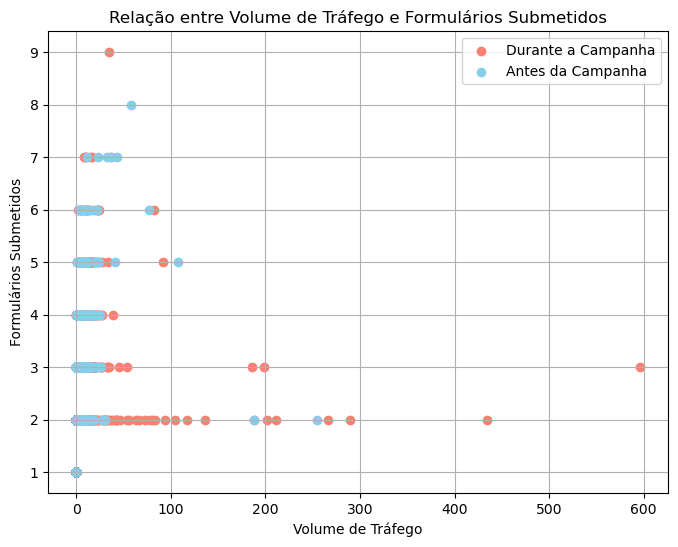

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(simulacao.df_durante['Number of Pageviews'], simulacao.df_durante['Number of Unique Forms Submitted'], color='salmon', label='Durante a Campanha')
plt.scatter(simulacao.df_antes['Number of Pageviews'], simulacao.df_antes['Number of Unique Forms Submitted'], color='skyblue', label='Antes da Campanha')
plt.xlabel('Volume de Tráfego')
plt.ylabel('Formulários Submetidos')
plt.title('Relação entre Volume de Tráfego e Formulários Submetidos')
plt.legend()
plt.grid(True)
plt.show()


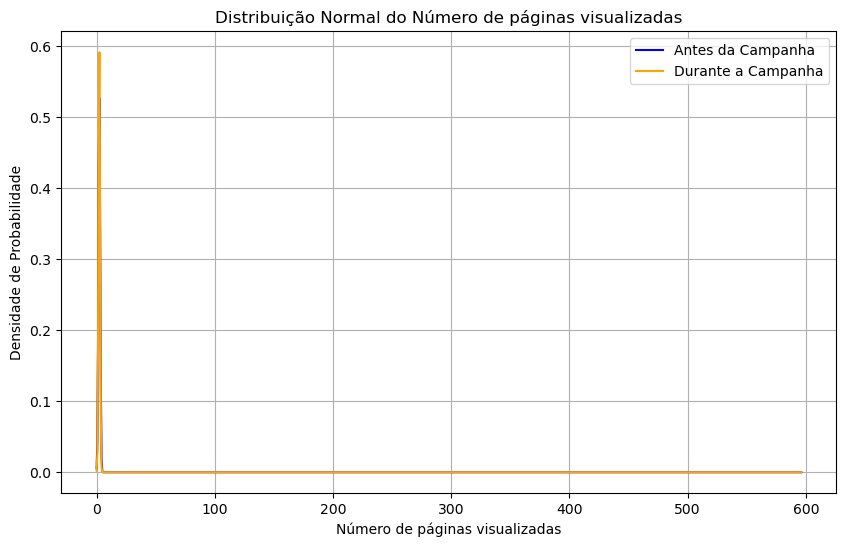

In [24]:

# Definindo os parâmetros das distribuições normais
x_min = min(simulacao.df_antes['Number of Pageviews'].min(), simulacao.df_durante['Number of Pageviews'].min())
x_max = max(simulacao.df_antes['Number of Pageviews'].max(), simulacao.df_durante['Number of Pageviews'].max())

x = np.linspace(x_min, x_max, 1000)

# Calculando as distribuições normais antes da campanha
pdf_antes_forms_submetido = norm.pdf(x, loc=simulacao.media_antes_forms_submetido, scale=simulacao.std_antes_forms_submetido)

# Calculando as distribuições normais durante a campanha
pdf_durante_forms_submetido = norm.pdf(x, loc=simulacao.media_durante_forms_submetido, scale=simulacao.std_durante_forms_submetido)

# Criando o gráfico
plt.figure(figsize=(10, 6))

# Plotando as distribuições normais antes e durante a campanha
plt.plot(x, pdf_antes_forms_submetido, color='blue', label='Antes da Campanha')
plt.plot(x, pdf_durante_forms_submetido, color='orange', label='Durante a Campanha')

plt.title('Distribuição Normal do Número de páginas visualizadas')
plt.xlabel('Número de páginas visualizadas')
plt.ylabel('Densidade de Probabilidade')
plt.legend()

plt.grid(True)
plt.show()


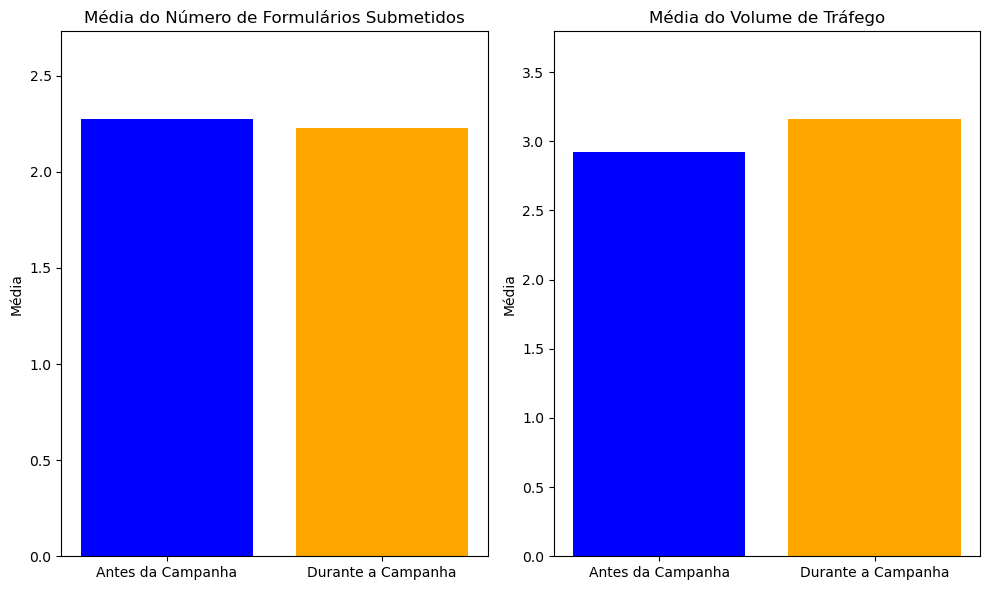

In [25]:
# Definindo os dados para os gráficos
labels = ['Antes da Campanha', 'Durante a Campanha']
antes_forms_submetido_mean = simulacao.media_antes_forms_submetido
durante_forms_submetido_mean = simulacao.media_durante_forms_submetido
antes_trafego_mean = simulacao.media_antes_trafego
durante_trafego_mean = simulacao.media_durante_trafego

# Criando os gráficos
plt.figure(figsize=(10, 6))

# Gráfico de conversão
plt.subplot(1, 2, 1)
plt.bar(labels, [antes_forms_submetido_mean, durante_forms_submetido_mean], color=['blue', 'orange'])
plt.title('Média do Número de Formulários Submetidos')
plt.ylabel('Média')
plt.ylim(0, max(antes_forms_submetido_mean, durante_forms_submetido_mean) * 1.2)

# Gráfico de tráfego
plt.subplot(1, 2, 2)
plt.bar(labels, [antes_trafego_mean, durante_trafego_mean], color=['blue', 'orange'])
plt.title('Média do Volume de Tráfego')
plt.ylabel('Média')
plt.ylim(0, max(antes_trafego_mean, durante_trafego_mean) * 1.2)

plt.tight_layout()
plt.show()

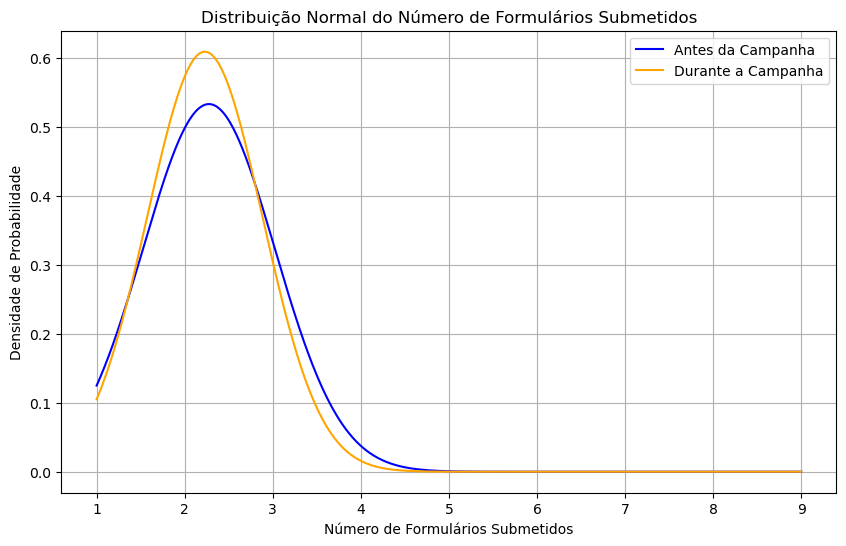

In [26]:
# Definindo os parâmetros das distribuições normais
x_min = min(simulacao.df_antes['Number of Unique Forms Submitted'].min(), simulacao.df_durante['Number of Unique Forms Submitted'].min())
x_max = max(simulacao.df_antes['Number of Unique Forms Submitted'].max(), simulacao.df_durante['Number of Unique Forms Submitted'].max())

x = np.linspace(x_min, x_max, 1000)

# Calculando as distribuições normais antes da campanha
pdf_antes_forms_submetido = norm.pdf(x, loc=simulacao.media_antes_forms_submetido, scale=simulacao.std_antes_forms_submetido)

# Calculando as distribuições normais durante a campanha
pdf_durante_forms_submetido = norm.pdf(x, loc=simulacao.media_durante_forms_submetido, scale=simulacao.std_durante_forms_submetido)

# Criando o gráfico
plt.figure(figsize=(10, 6))

# Plotando as distribuições normais antes e durante a campanha
plt.plot(x, pdf_antes_forms_submetido, color='blue', label='Antes da Campanha')
plt.plot(x, pdf_durante_forms_submetido, color='orange', label='Durante a Campanha')

plt.title('Distribuição Normal do Número de Formulários Submetidos')
plt.xlabel('Número de Formulários Submetidos')
plt.ylabel('Densidade de Probabilidade')
plt.legend()

plt.grid(True)
plt.show()


### Análise da Simulação da taxa de Conversão

* Número de Formulários Submetidos: Os gráficos mostram um aumento no número de formulários submetidos durante a campanha em comparação com o período anterior. Esse aumento sugere que o desconto substancial incentivou mais inscrições, aumentando significativamente o engajamento dos usuários.
* Volume de Tráfego: Similarmente, observa-se um aumento no volume de tráfego durante a campanha. Este aumento indica que a oferta atraiu mais visitantes ao site, refletindo o interesse despertado pelo desconto significativo.



A simulação reforça a observação de que os aumentos nos números de formulários submetidos e no tráfego são robustos e significativos. Esses resultados não são aleatórios, mas sim uma consequência direta da campanha.
Distribuições Normais: A análise das distribuições normais mostra que os dados estão bem comportados e seguem uma tendência clara, o que reforça a eficácia da campanha.
Impacto da Campanha

A campanha "Matrícula com 50% Off" foi bem-sucedida em aumentar tanto o engajamento quanto o tráfego para o site, comprovando que descontos significativos são uma poderosa ferramenta de marketing para impulsionar a conversão.
Os gráficos e as simulações mostram que a estratégia adotada foi eficaz e deveria ser considerada para futuras campanhas para maximizar o alcance e a conversão. Dessa forma, os resultados demonstram claramente que a campanha de desconto foi eficaz, atraindo mais usuários e incentivando mais inscrições. A estratégia de desconto, portanto, não só aumentou a visibilidade da oferta como também impulsionou ações concretas por parte dos visitantes do site.

# Conclusão

Ao longo das várias campanhas analisadas, observa-se uma tendência clara de sucesso em engajar e converter potenciais clientes. Destacado por aumentos significativos em métricas chave como número de formulários submetidos e volume de tráfego. Estes resultados foram robustamente apoiados por simulações de Monte Carlo, que ajudaram a validar a eficácia das estratégias de marketing utilizadas.

A campanha "Matrícula de 299 por 79" se destacou ao demonstrar como preços competitivos podem servir de catalisador para aumentar a adesão e conversão dos clientes. Esta estratégia não apenas aumentou o volume de tráfego, como também elevou significativamente o número de inscrições.

Por outro lado, a campanha "Matriculou e Ganhou a Caneta" ilustrou o impacto positivo de incorporar brindes na promoção. Esta abordagem não só cultivou o interesse em torno da matrícula, mas também fortaleceu a fidelidade à marca, ao criar uma conexão mais tangível entre a Perason/ Wizard com os consumidores. Este tipo de incentivo mostrou-se uma ferramenta poderosa para aumentar as conversões, comprovando que pequenos estímulos podem gerar grandes retornos.

Já a campanha "Matrícula com 50% Off" evidenciou a eficácia de descontos substanciais na promoção de cursos. O declínio significativo nos preços provou ser uma força motriz, atraindo uma quantidade substancial de tráfego e aumentando drasticamente as taxas de inscrição. A clareza e a atratividade da oferta foram decisivas, garantindo que os potenciais alunos não apenas visitassem o site, mas também completassem o processo de inscrição.



A análise dessas campanhas, permitiu não apenas quantificar o sucesso de cada iniciativa, mas também entender profundamente os elementos que contribuíram para esse sucesso. A habilidade de decompor e analisar essas campanhas através de simulações estatísticas robustas forneceu insights valiosos que oferecem uma visão abrangente sobre como cada estratégia pode impulsionar e trabalhar no processo de conversão de clientes.

Portanto, ao avançar, recomenda-se que a Pearson continue a explorar uma combinação de estratégias de preços competitivos, ofertas tangíveis e descontos impactantes para maximizar tanto a aquisição quanto a retenção de alunos. A experimentação com uma variedade de ofertas promocionais mostrou-se eficaz, revelando que uma abordagem diversificada pode satisfazer as necessidades variadas de potenciais alunos. Explorar diferentes tipos de incentivos, desde descontos substanciais até brindes tangíveis, ajudará a empresa a entender melhor quais gatilhos são mais eficazes para diferentes segmentos de mercado.

Além disso, a personalização e a segmentação surgem como fatores críticos para o aprofundamento da conexão com o público-alvo. Utilizar dados comportamentais e demográficos para segmentar a audiência não só aumentará a relevância das ofertas para cada cliente potencial, mas também melhorará significativamente as taxas de conversão. Esta abordagem personalizada permite que a Pearson/Wizard ofereça experiências mais significativas e sob medida, que são fundamentais para a construção de relacionamentos duradouros e para a fidelização de clientes.




